In [1]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from paper_visualizations import * 
from PixelEM import * 
# from test_sample import test_sample_obj
from withClustAnalysis import *

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# compile all algo and MV PRJs into one big table
df = compile_all_algo_PRJs()

In [6]:
# df.groupby(["objid","sample_num","num_workers"])

In [12]:
selected_df = df[(df["num_workers"]==25)&(df["sample_num"]==0)&(df["objid"]==1)&(df["clust"]==0)]

In [49]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
all_prjs = deriveGTinGroundTruthExperiments(sample, objid, "GT",thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])

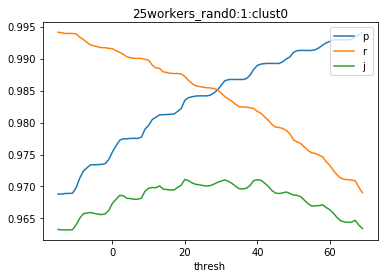

In [53]:
plt.title("{}:{}:clust{}".format(sample,objid,cluster_id))
plt.plot(df["thresh"],df["p"],label="p")
plt.plot(df["thresh"],df["r"],label="r")
plt.plot(df["thresh"],df["j"],label="j")
plt.xlabel("thresh")
plt.legend(loc="upper right")

In [57]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
def run_threshold_experiment(sample,objid,algo,thresh_lst,cluster_id):
    all_prjs = deriveGTinGroundTruthExperiments(sample, objid, algo,thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
    df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])
    
    plt.figure()
    plt.title("{}:{}:clust{}".format(sample,objid,cluster_id))
    plt.plot(df["thresh"],df["p"],label="p")
    plt.plot(df["thresh"],df["r"],label="r")
    plt.plot(df["thresh"],df["j"],label="j")
    plt.xlabel("thresh")
    plt.legend(loc="upper right")

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


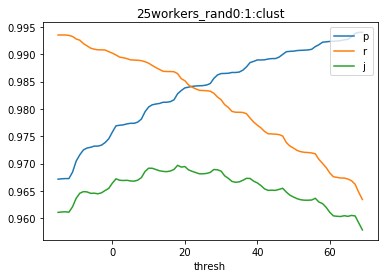

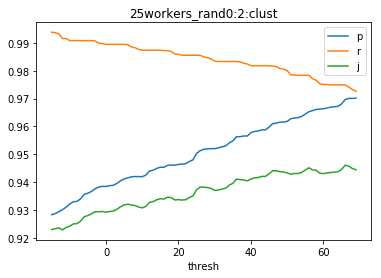

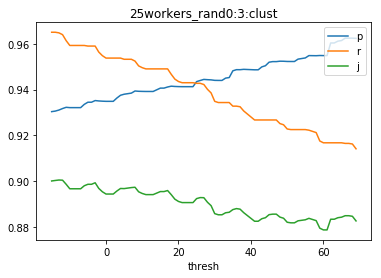

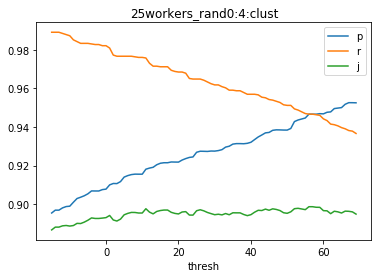

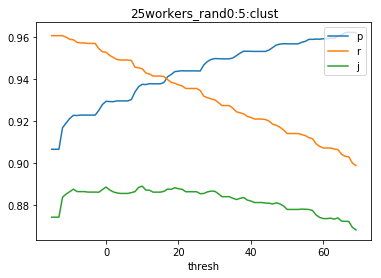

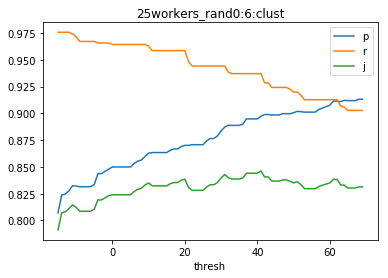

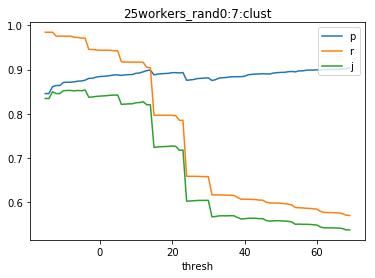

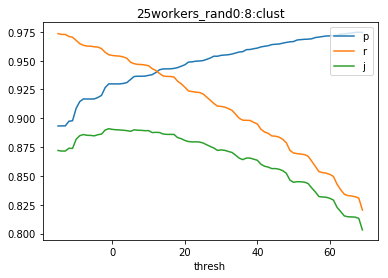

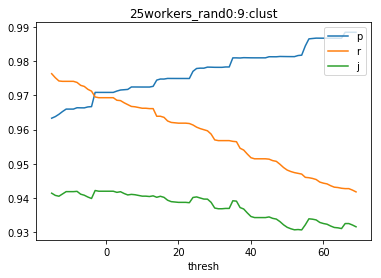

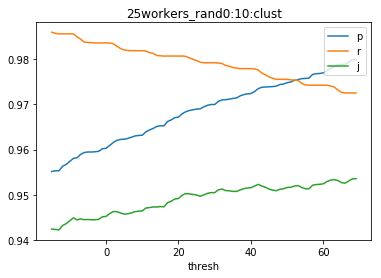

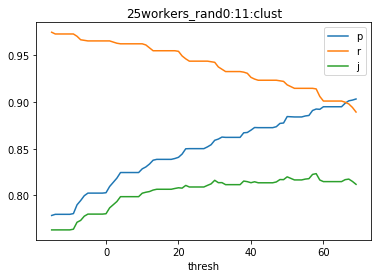

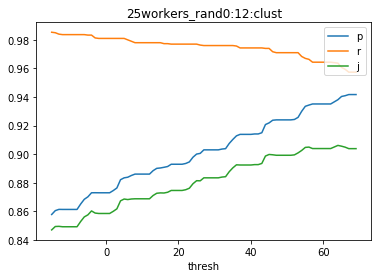

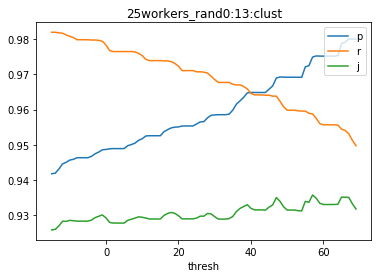

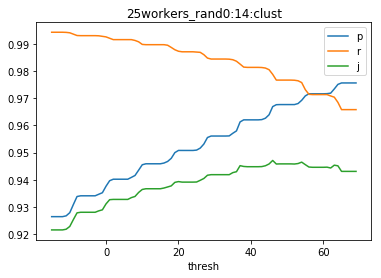

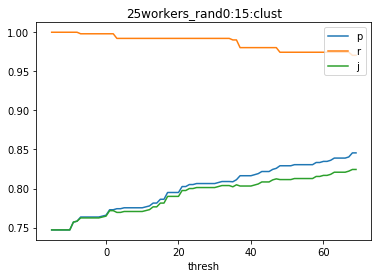

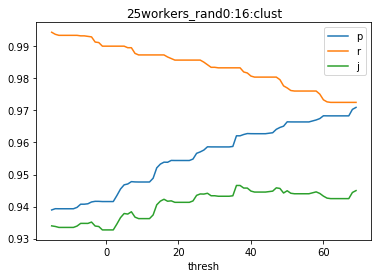

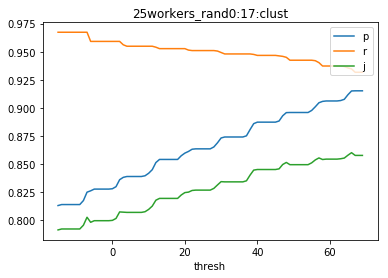

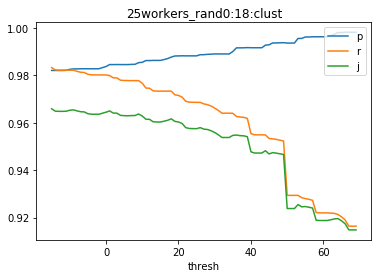

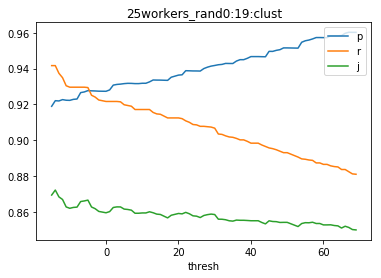

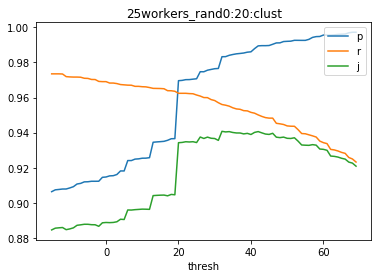

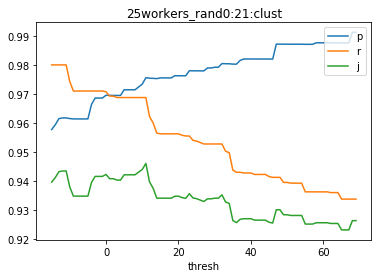

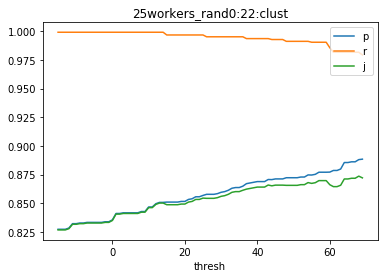

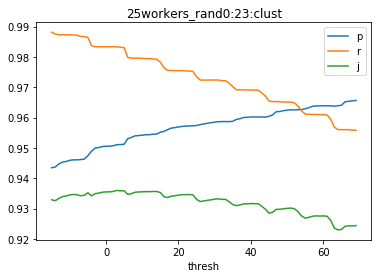

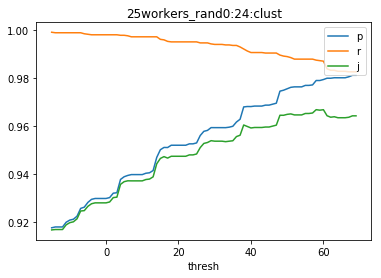

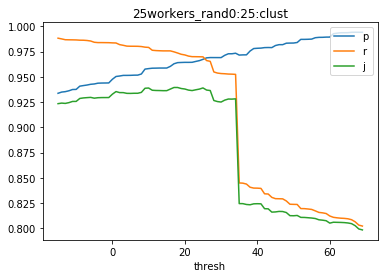

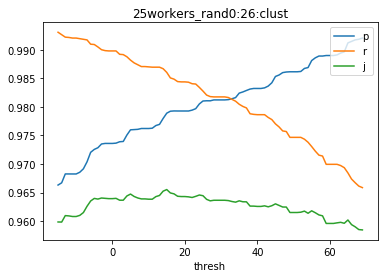

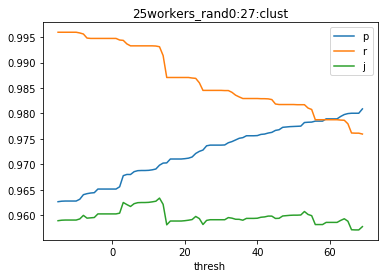

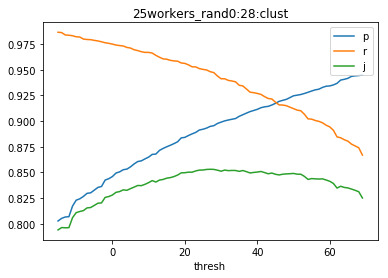

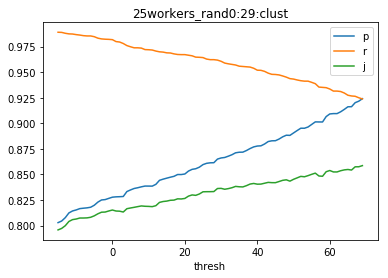

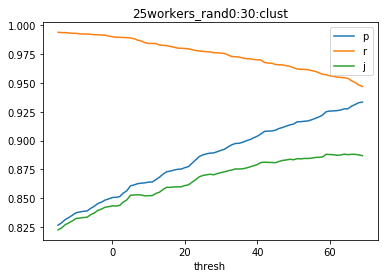

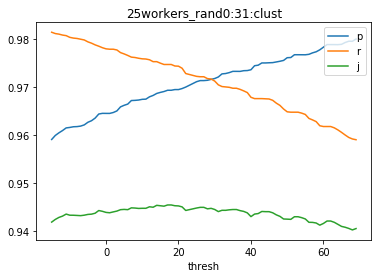

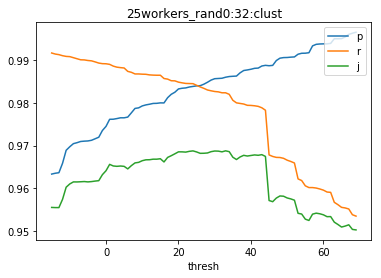

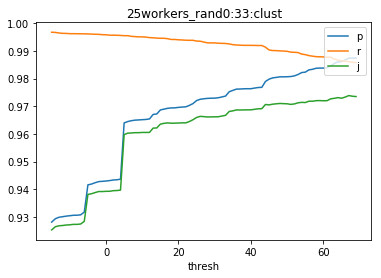

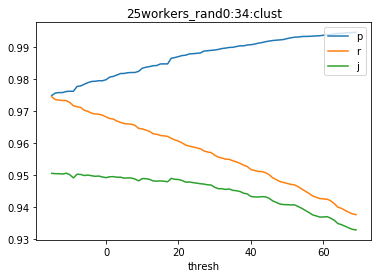

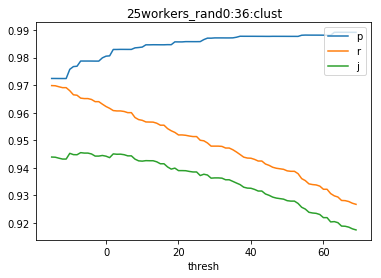

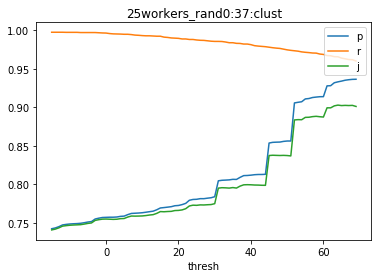

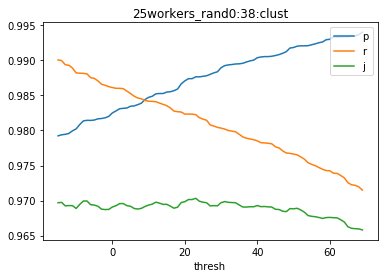

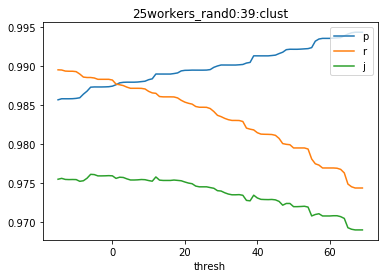

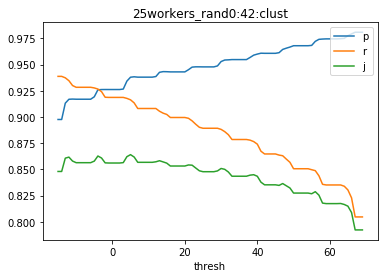

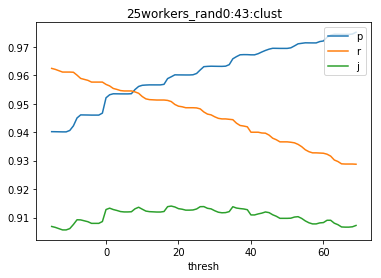

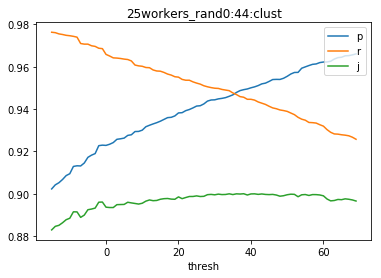

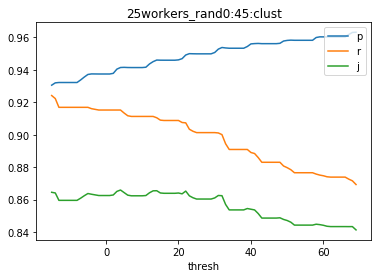

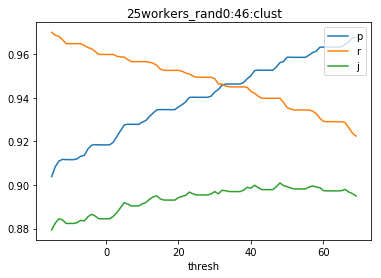

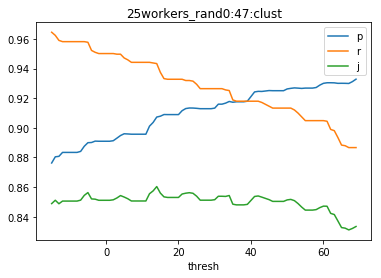

In [56]:
for objid in object_lst:
    run_threshold_experiment(sample,objid,"GT",thresh_lst,"")

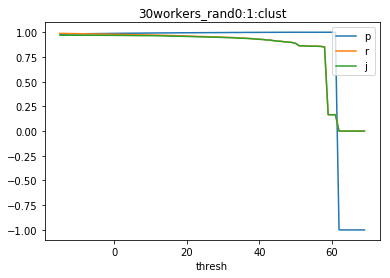

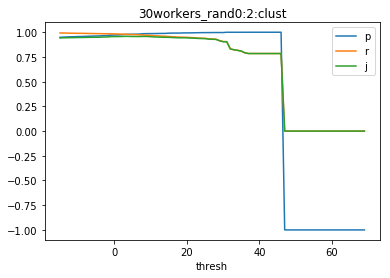

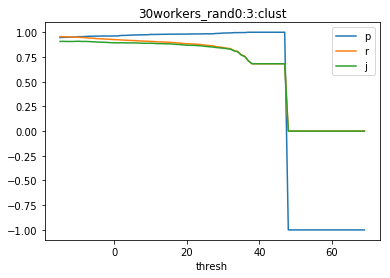

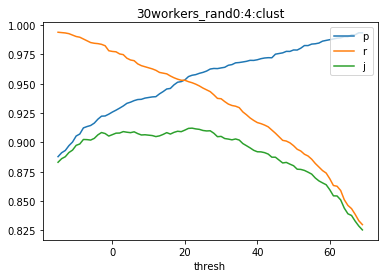

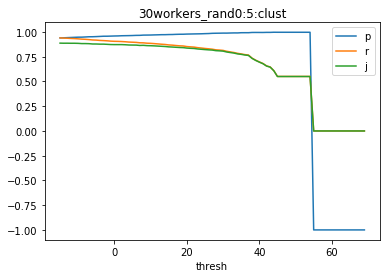

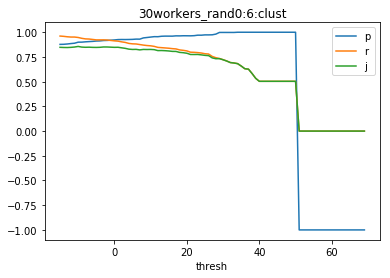

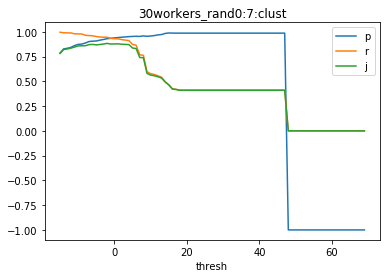

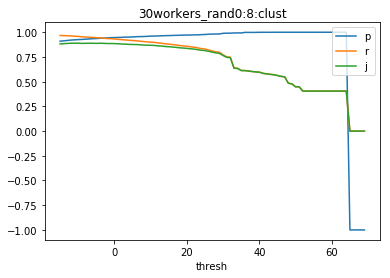

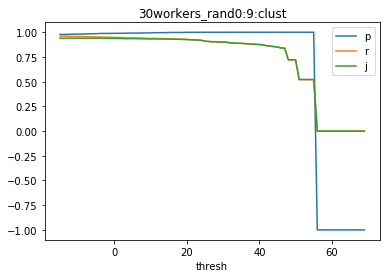

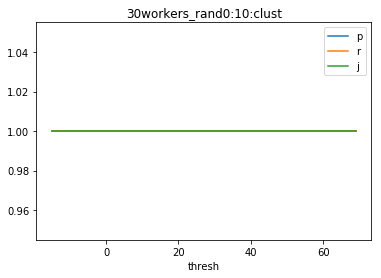

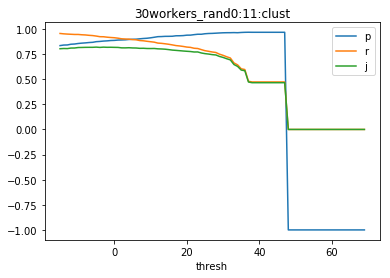

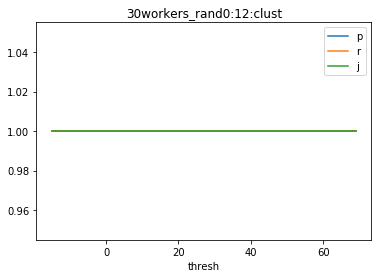

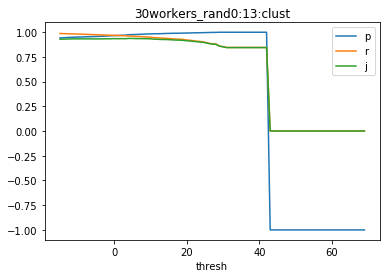

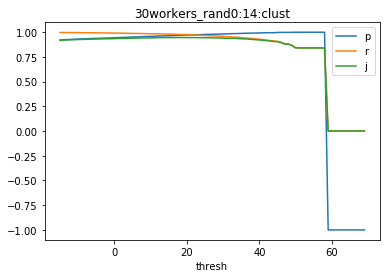

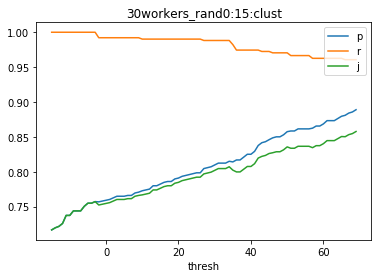

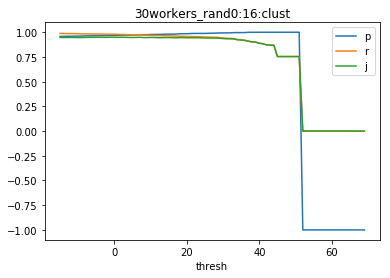

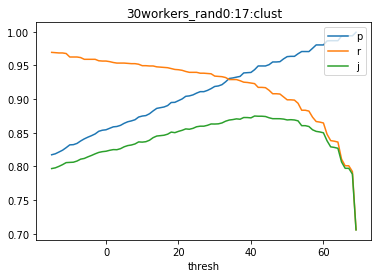

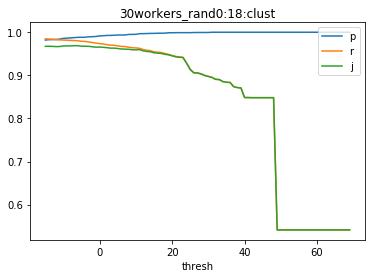

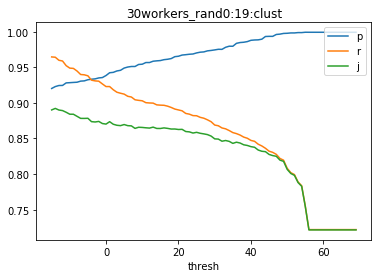

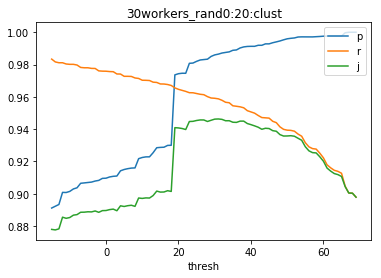

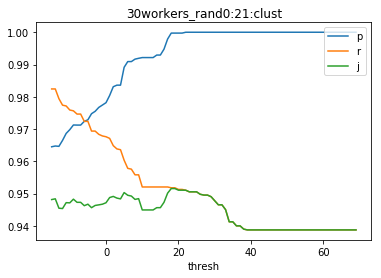

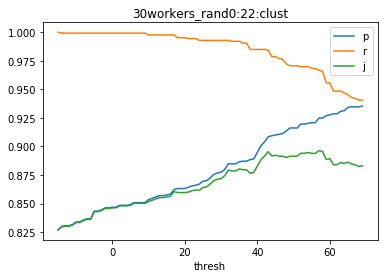

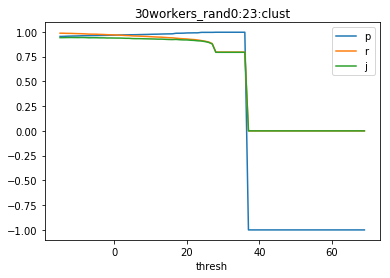

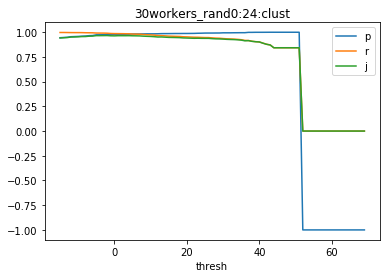

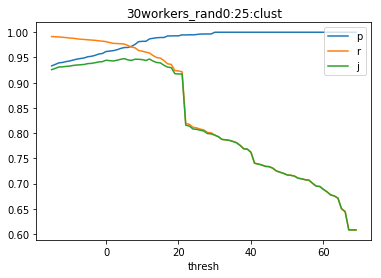

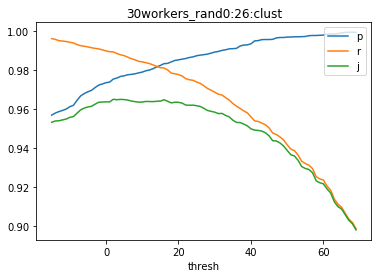

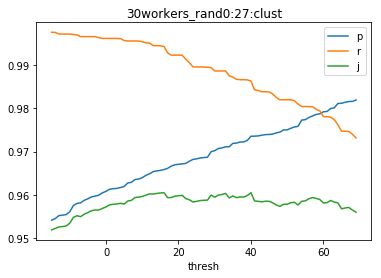

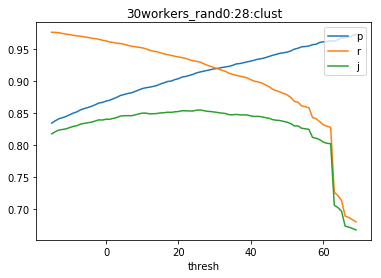

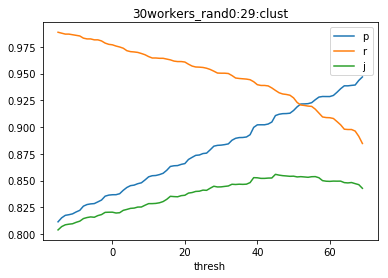

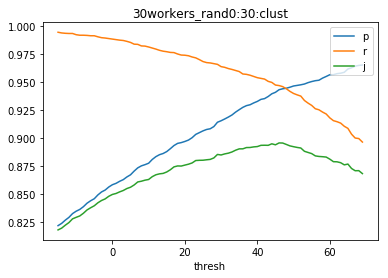

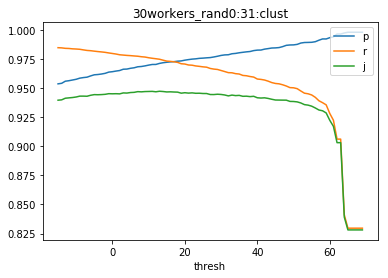

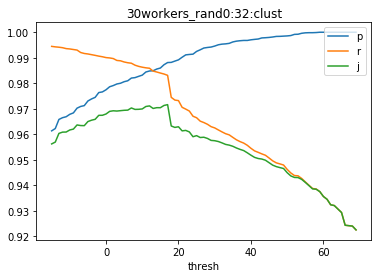

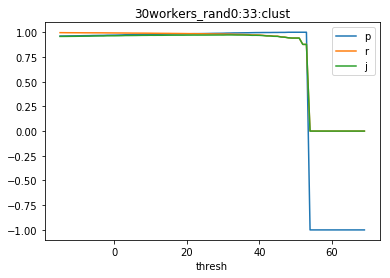

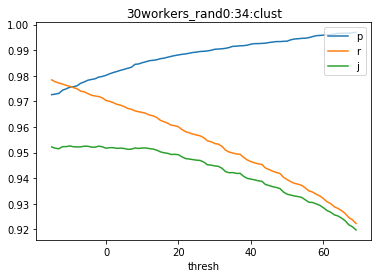

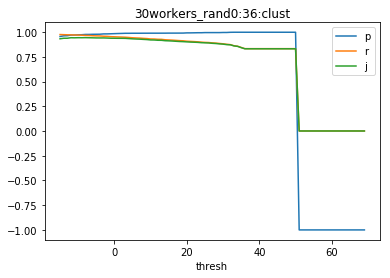

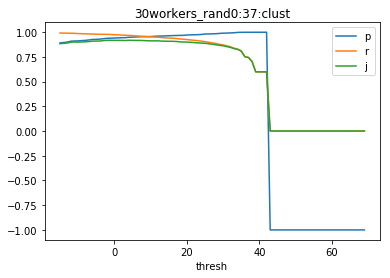

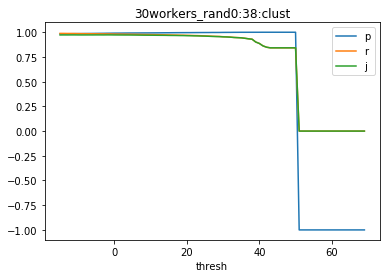

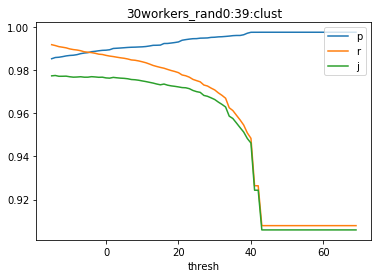

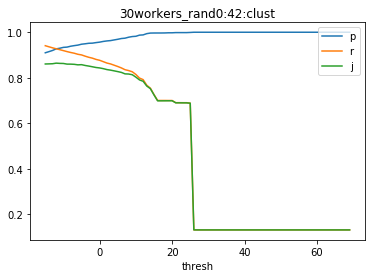

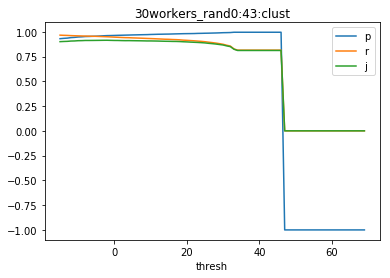

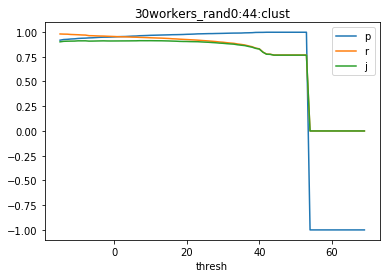

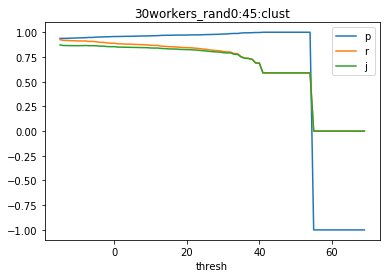

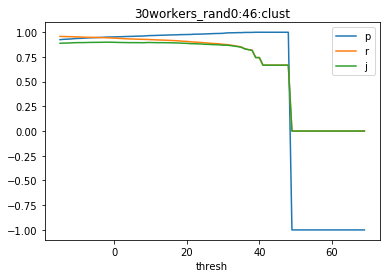

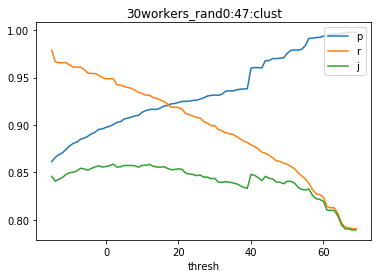

In [58]:
for objid in object_lst:
    run_threshold_experiment("30workers_rand0",objid,"GTLSA",thresh_lst,"")

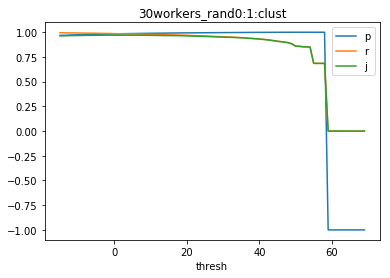

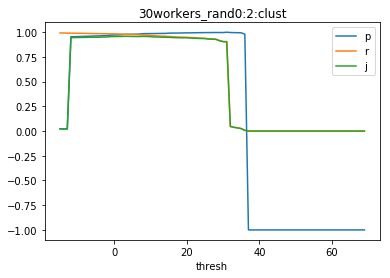

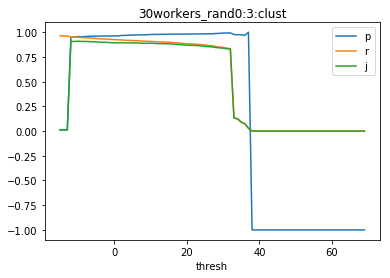

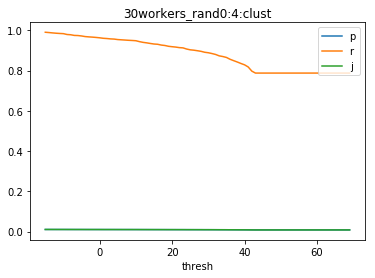

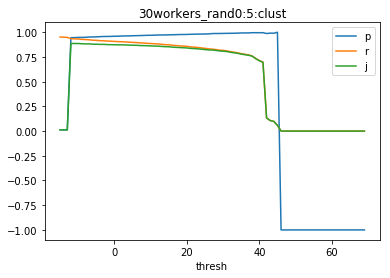

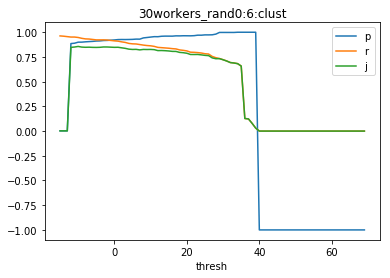

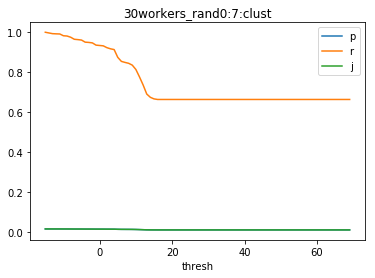

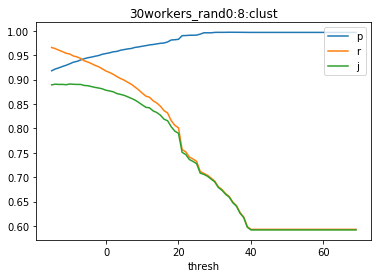

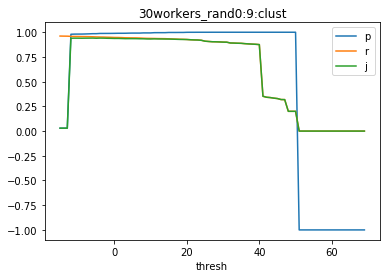

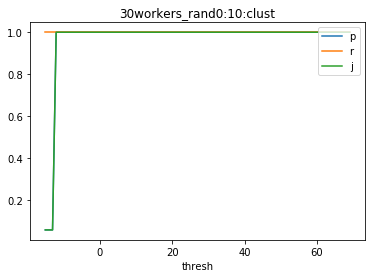

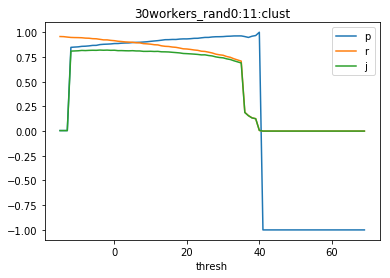

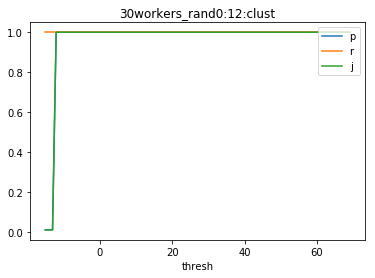

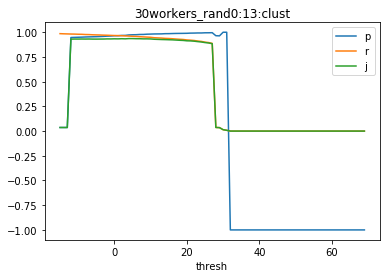

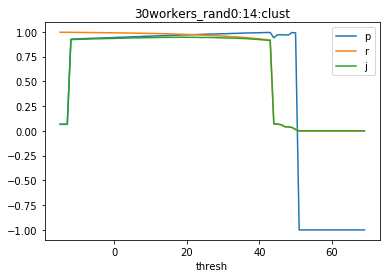

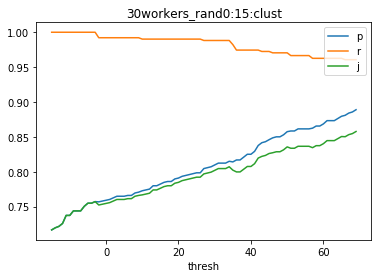

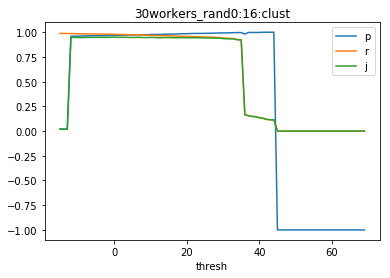

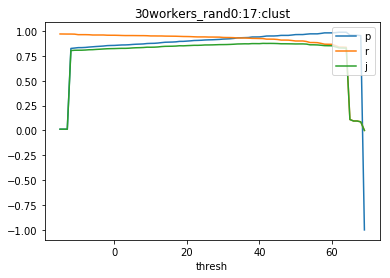

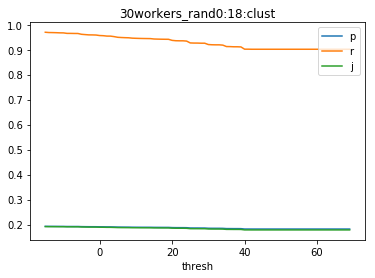

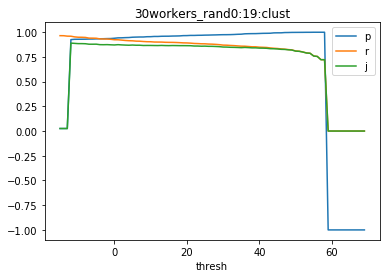

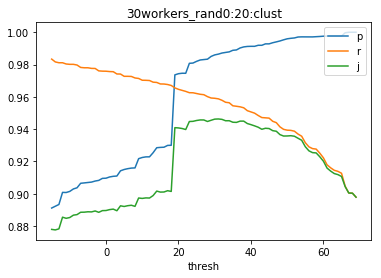

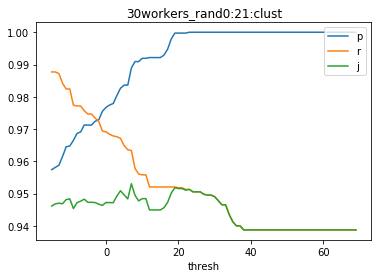

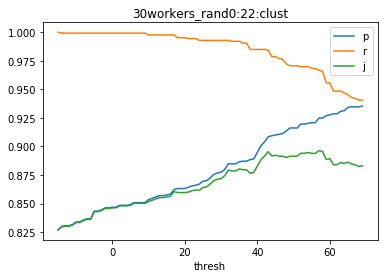

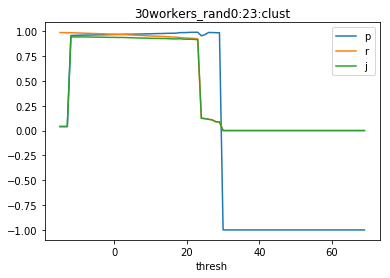

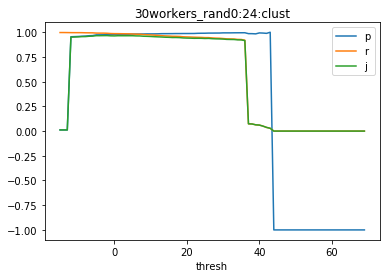

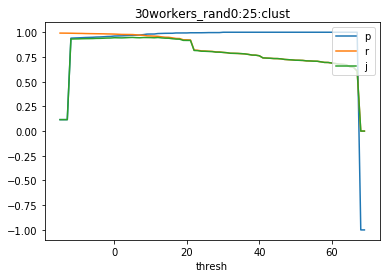

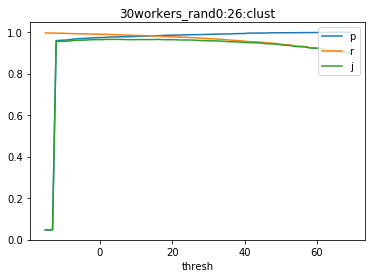

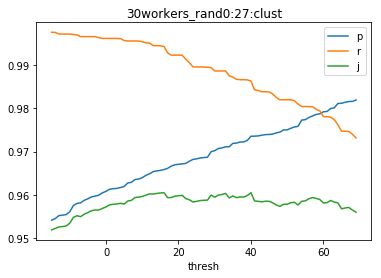

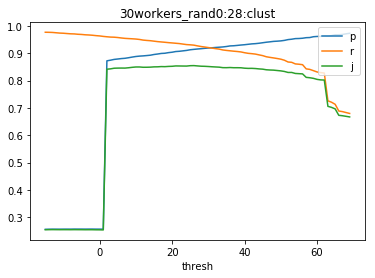

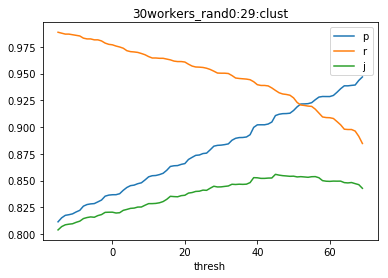

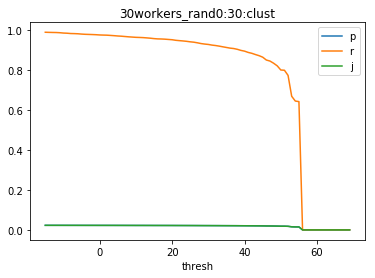

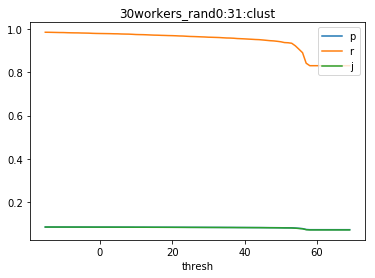

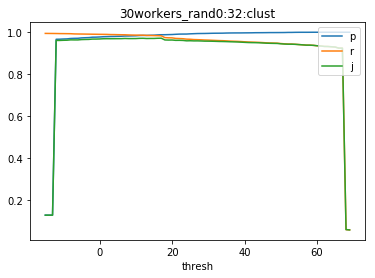

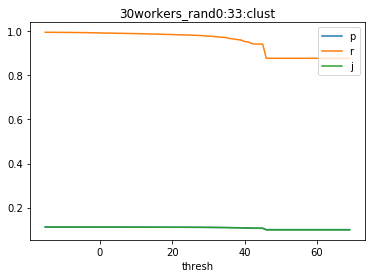

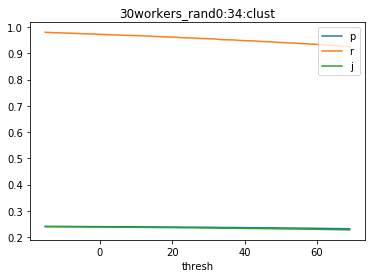

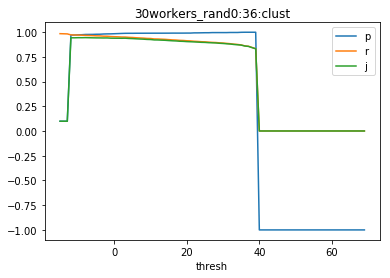

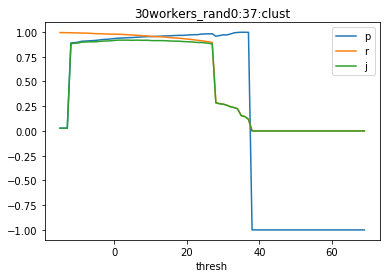

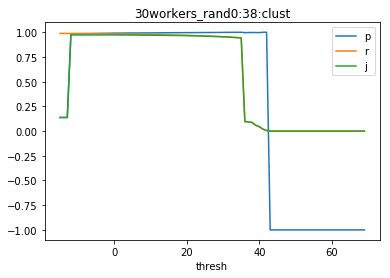

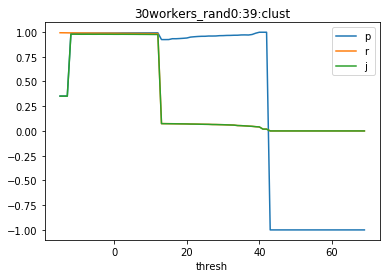

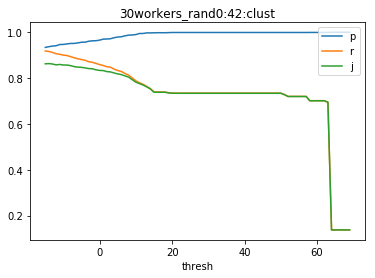

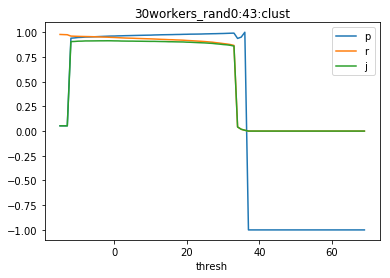

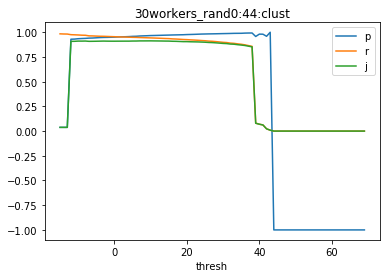

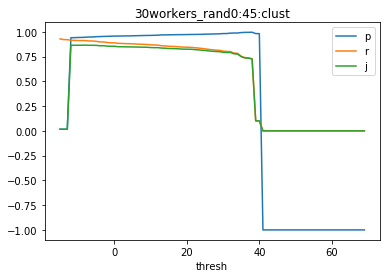

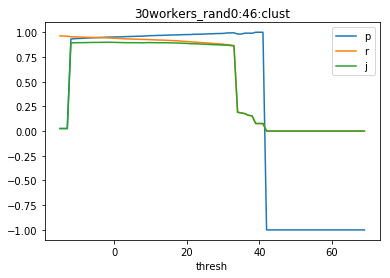

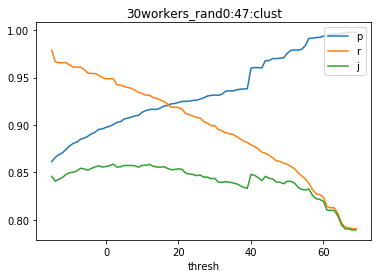

In [59]:
for objid in object_lst:
    run_threshold_experiment("30workers_rand0",objid,"isoGTLSA",thresh_lst,"")

# Online Binary search

In [5]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
algo = "GTLSA"
all_prjs = deriveGTinGroundTruthExperiments(sample, objid, algo,thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])

In [10]:
track = []
thresh_min = -200
thresh_max = 200

delta = np.abs(thresh_max -thresh_min)
p = 0
r = inf
#while(np.abs(p-r)>1e-5):
prev_p =inf
prev_r = 0
#while(delta>50):
i=0
while (abs(prev_p-p)>1e-3 or abs(prev_r-r)>1e-3):
    prev_p = p
    prev_r = r
    thresh = (thresh_min+thresh_max)/2.
    p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False,rerun_existing=True)
    delta = np.abs(thresh_max -thresh_min)
    if p>r:
        right = thresh_min + 0.75*delta  
        thresh_max = right
    else: 
        left = thresh_min + 0.25*delta  
        thresh_min = left
    track.append([i,thresh, p,r,thresh_min,thresh_max])
    #print abs(prev_p-p) ,abs(prev_r-r)
    i+=1

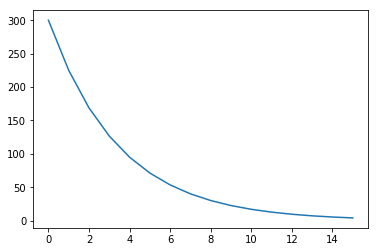

In [11]:
track = np.array(track)

deltas = np.abs(track[:,5]-track[:,4])

plt.plot(deltas)

In [12]:
idx = np.argsort(track[:,1])
ths =track[:,1][idx] 
ps = track[:,2][idx]
rs = track[:,3][idx]

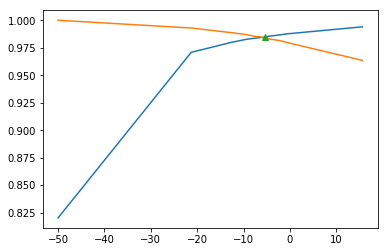

In [13]:
# for it,t in enumerate(track):
#     plt.plot(t[1],t[2],'o',ms=10/(it+1))
plt.plot(ths,ps,label="p")
plt.plot(ths,rs,label="r")
plt.plot(track[-1][1],track[-1][2],'^')

In [14]:
deltas

array([ 300.        ,  225.        ,  168.75      ,  126.5625    ,
         94.921875  ,   71.19140625,   53.39355469,   40.04516602,
         30.03387451,   22.52540588,   16.89405441,   12.67054081,
          9.50290561,    7.12717921,    5.3453844 ,    4.0090383 ])

In [15]:
for objid in [2,4,23]:
    binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

NameError: name 'binary_search' is not defined

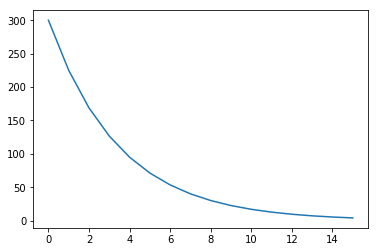

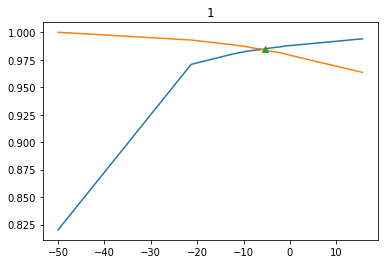

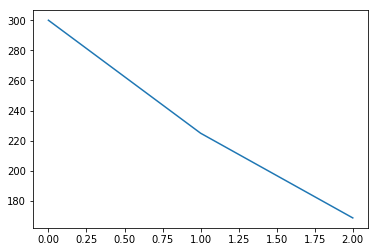

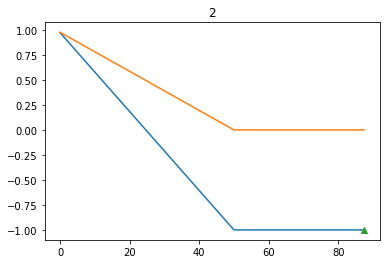

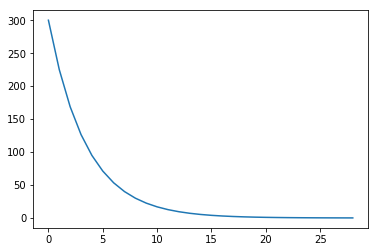

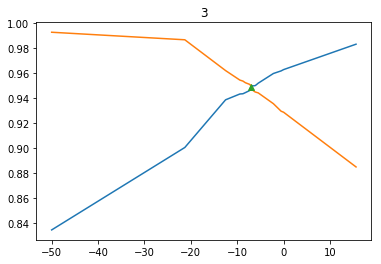

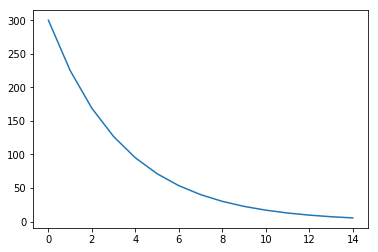

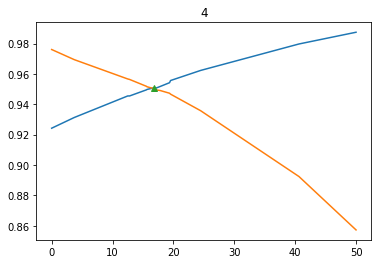

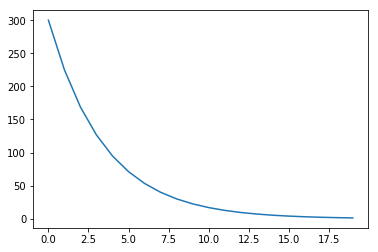

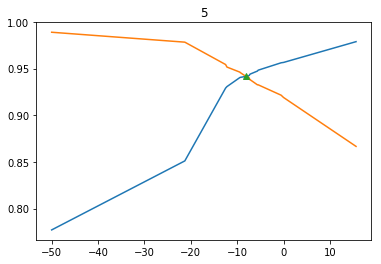

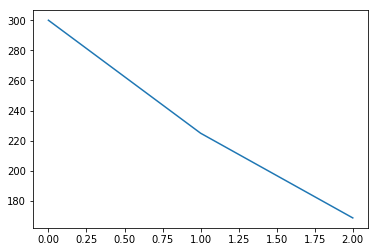

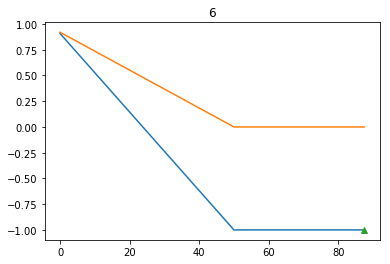

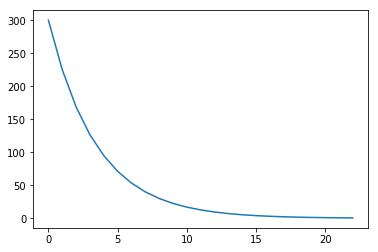

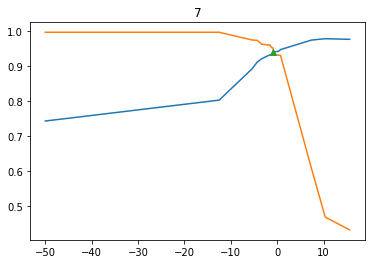

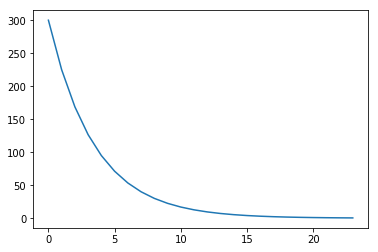

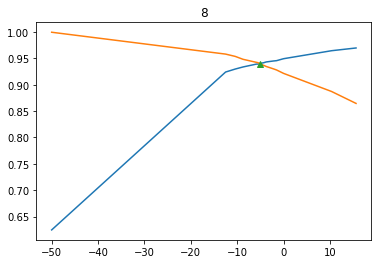

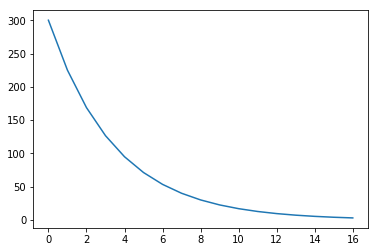

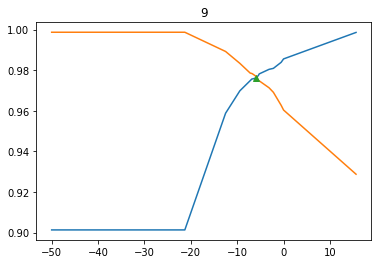

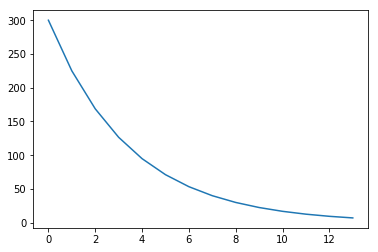

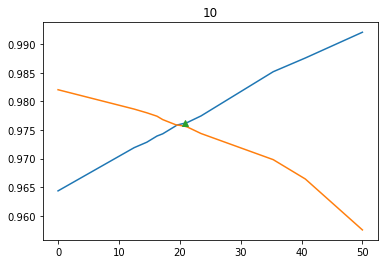

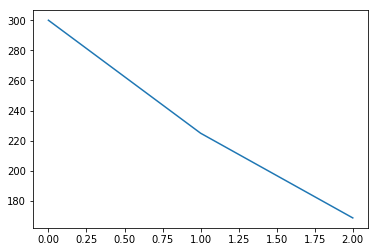

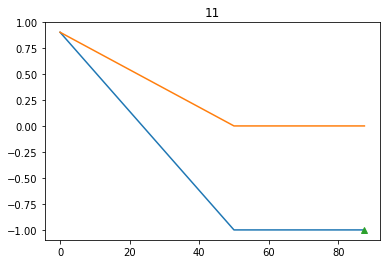

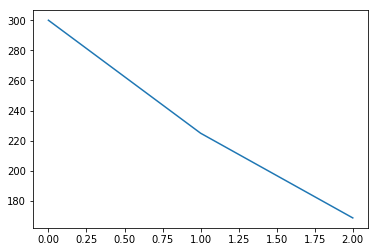

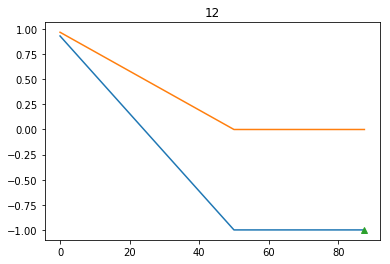

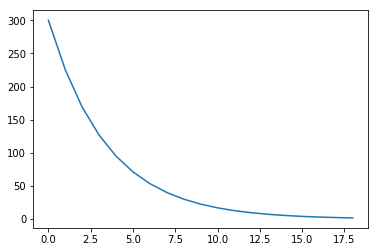

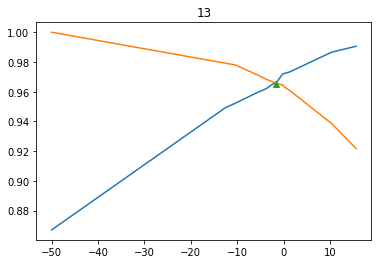

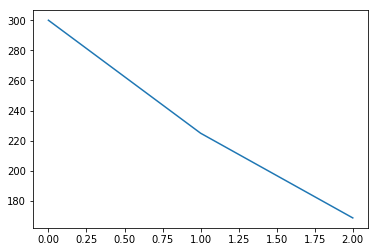

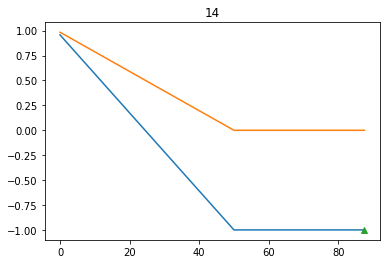

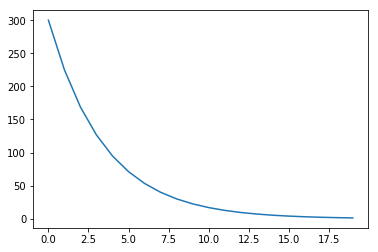

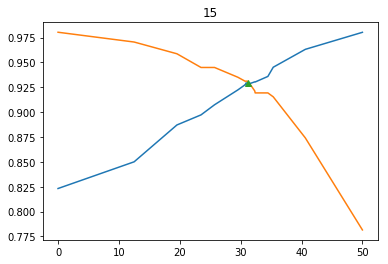

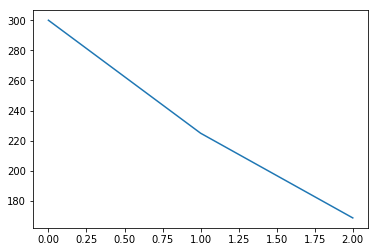

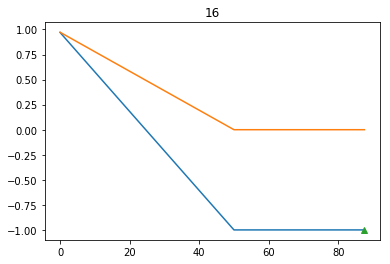

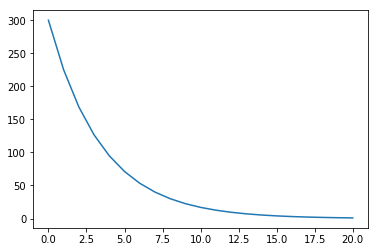

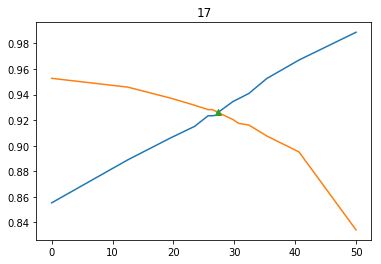

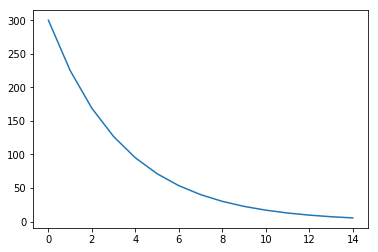

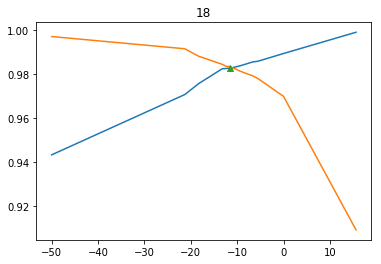

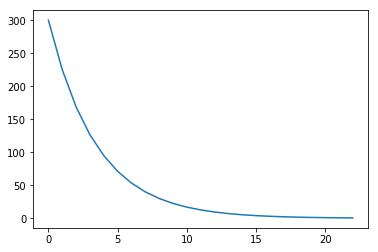

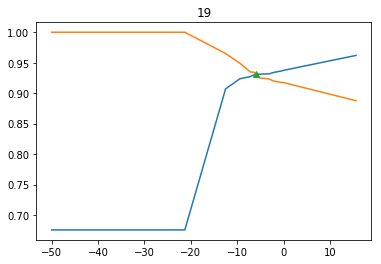

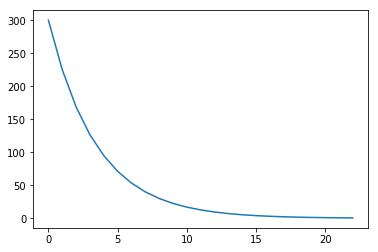

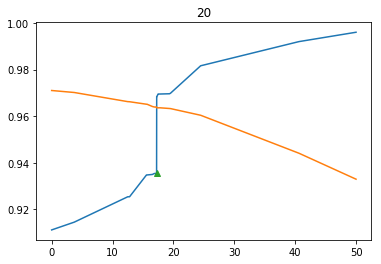

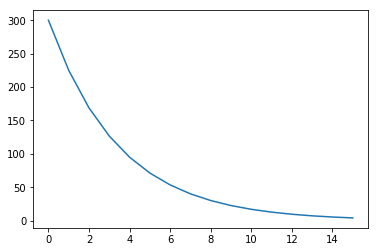

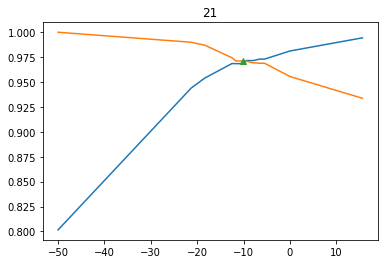

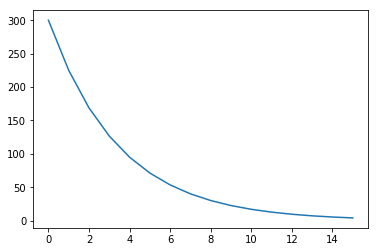

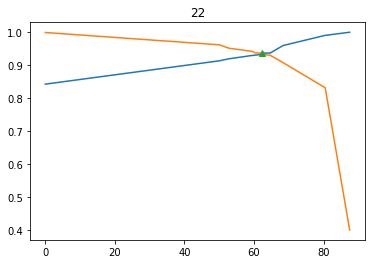

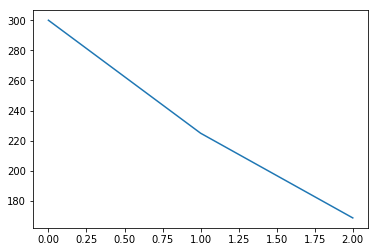

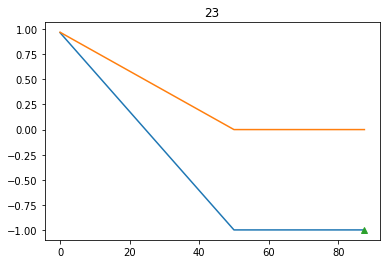

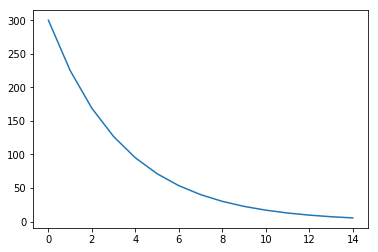

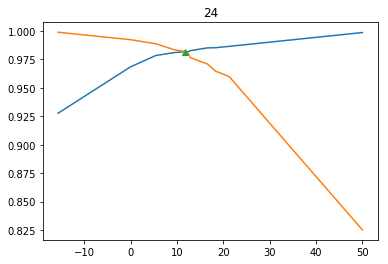

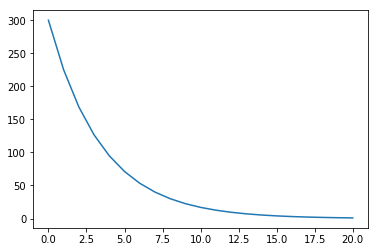

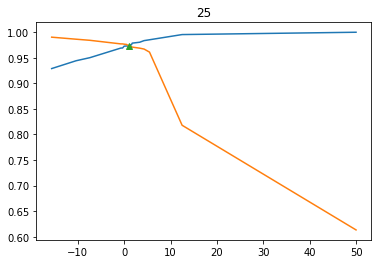

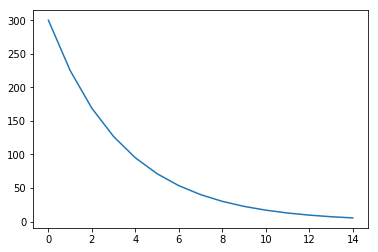

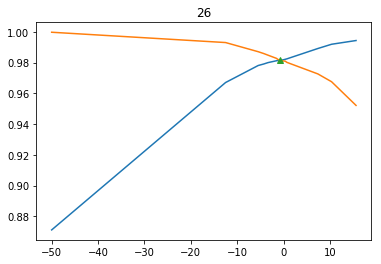

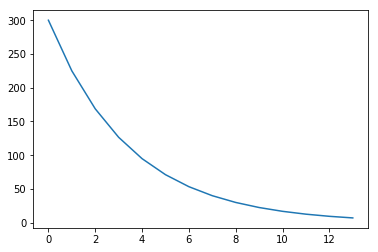

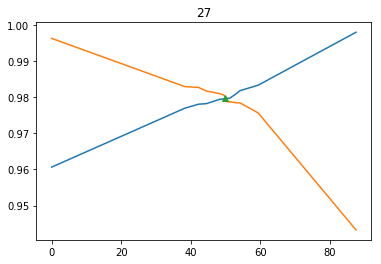

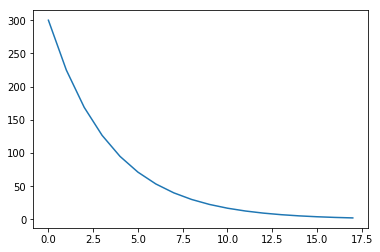

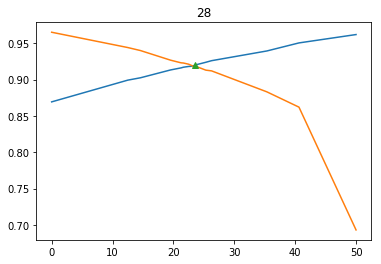

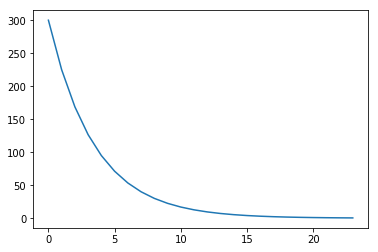

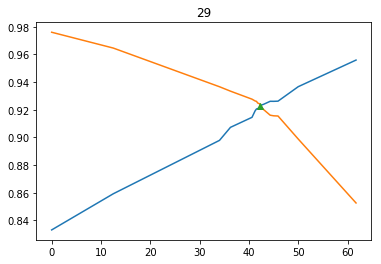

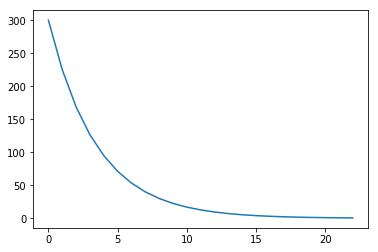

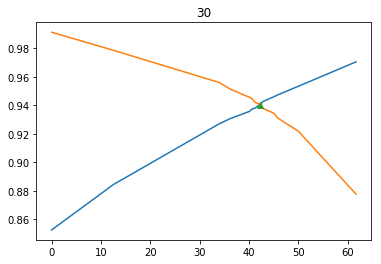

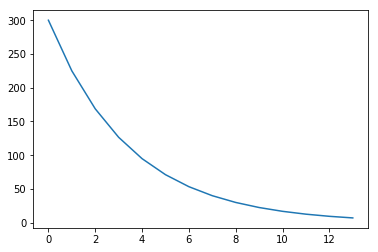

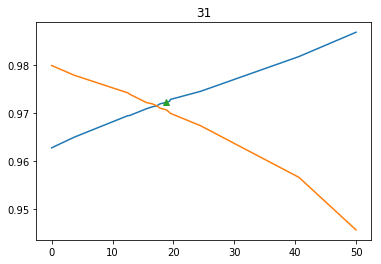

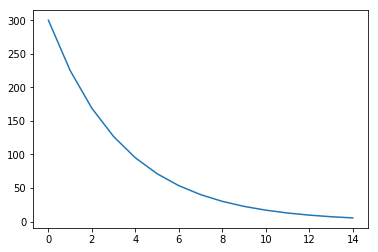

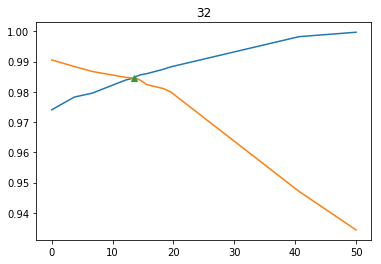

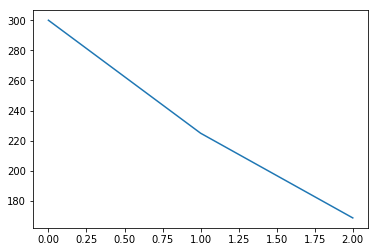

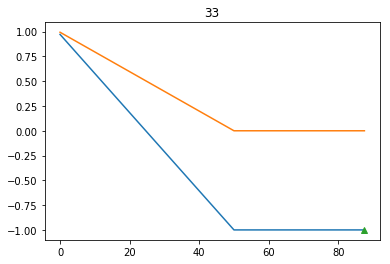

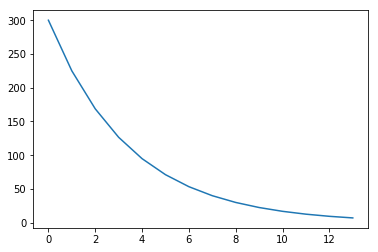

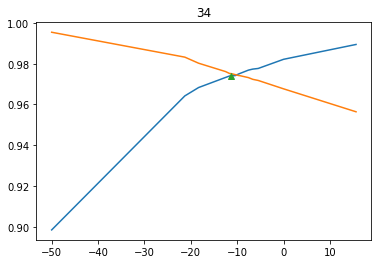

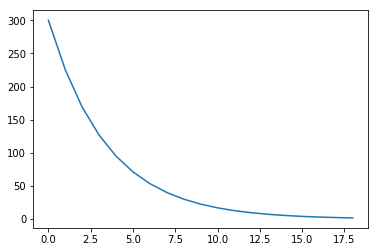

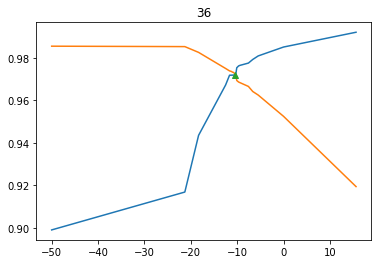

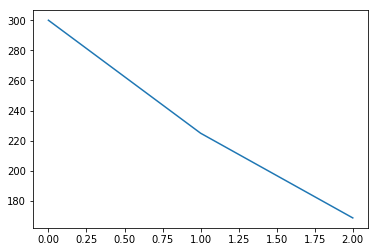

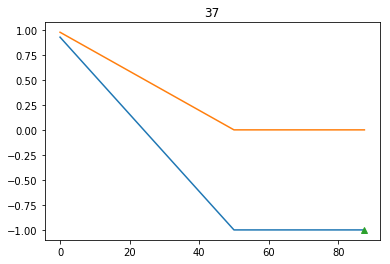

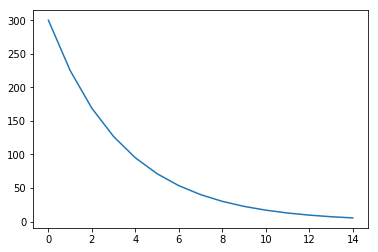

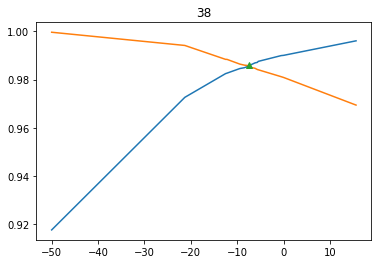

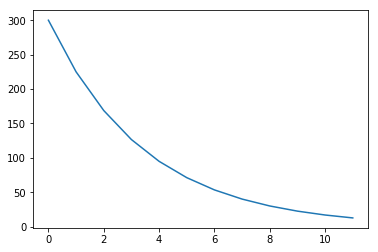

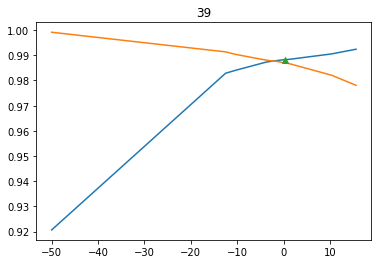

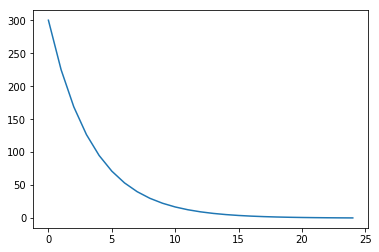

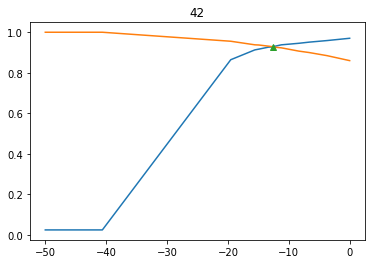

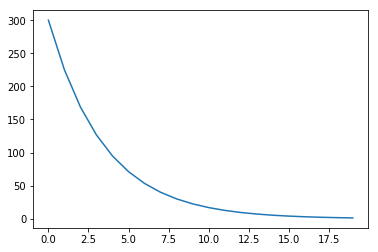

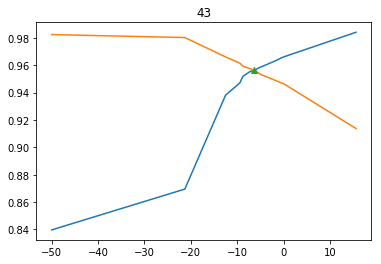

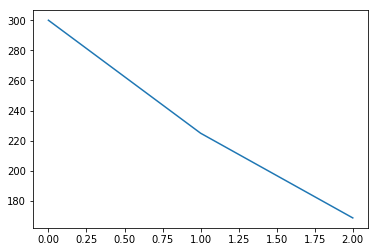

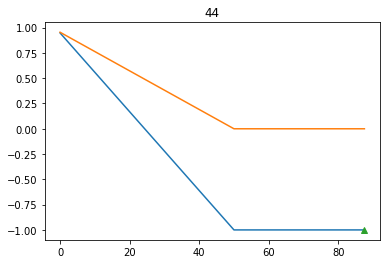

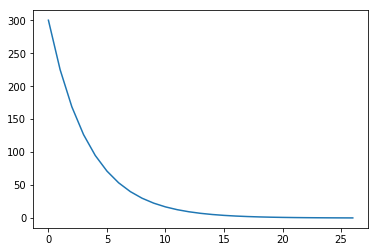

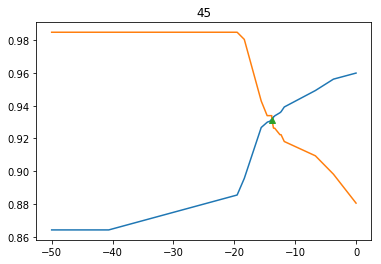

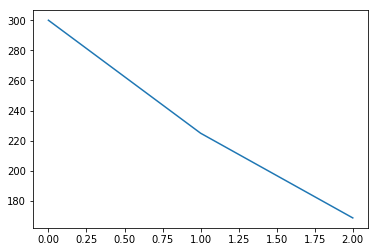

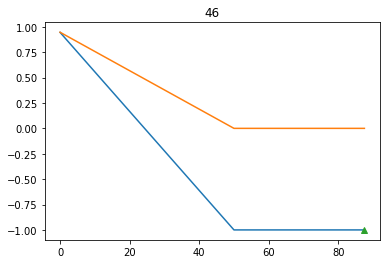

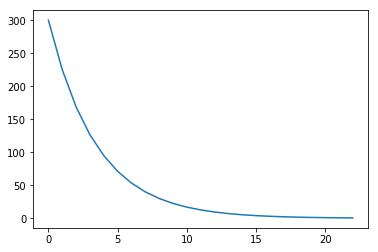

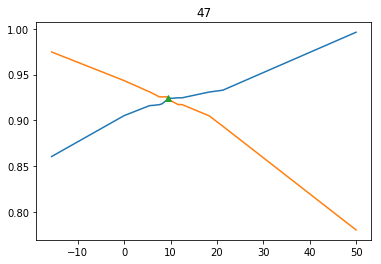

In [190]:
for objid in object_lst:
    binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

I think there is a bug when one of p or r becomes -1. 

In [17]:
def binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False):
    track = []
    thresh_min = -200
    thresh_max = 200

    delta = np.abs(thresh_max -thresh_min)
#     p = 0
#     r = inf
#     prev_p =inf
#     prev_r = 0
    p,r =0,0 
    i=0
    while (p==-1 or delta>1):
    #while (p==-1 or abs(prev_p-p)>1e-3 or abs(prev_r-r)>1e-3):

        prev_p = p
        prev_r = r
        thresh = (thresh_min+thresh_max)/2.
        #print "thresh:",thresh
        p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,thresh,cluster_id=cluster_id,exclude_isovote=exclude_isovote,rerun_existing=True)
        
        delta = np.abs(thresh_max -thresh_min)
        if p>r:
            right = thresh_min + 0.75*delta  
            thresh_max = right
        else: 
            left = thresh_min + 0.25*delta  
            thresh_min = left
        if p==-1:
            #if p =-1 then it is because the result area is zero, which means nothing was selected for gt
            # this meant that the threshold has overshot
            thresh_max = thresh_min+0.2*delta
        track.append([i,thresh, p,r,thresh_min,thresh_max])
        i+=1
        #print "thresh min max:",thresh_min,thresh_max
        #print "p,r,j:",p,r,j
    track = np.array(track)
    deltas = np.abs(track[:,5]-track[:,4])
#     plt.figure()
#     plt.plot(deltas)
    idx = np.argsort(track[:,1])
    ths =track[:,1][idx] 
    ps = track[:,2][idx]
    rs = track[:,3][idx]
    plt.figure()
    plt.title(objid)
    plt.plot(ths,ps,label="p")
    plt.plot(ths,rs,label="r")
    plt.plot(track[-1][1],track[-1][2],'^')
    

In [18]:
p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,0,cluster_id="",exclude_isovote=False,rerun_existing=True)

In [19]:
p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,50,cluster_id="",exclude_isovote=False,rerun_existing=True)

if p =-1 then it is because the result area is zero, which means nothing was selected for gt 

In [20]:
p,r,j

(-1, 0.0, 0.0)

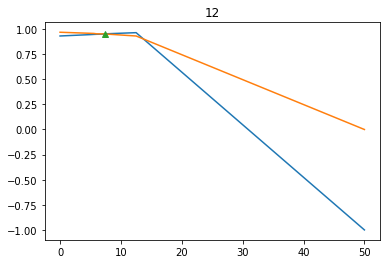

In [21]:
objid =12
binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

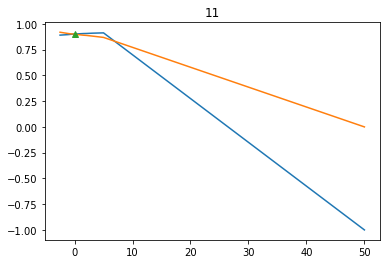

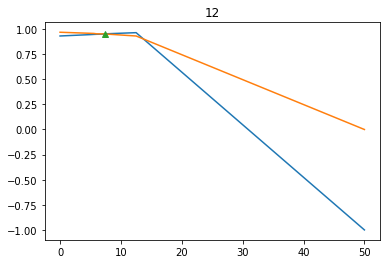

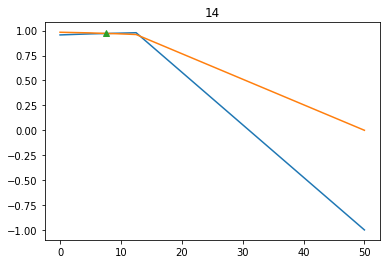

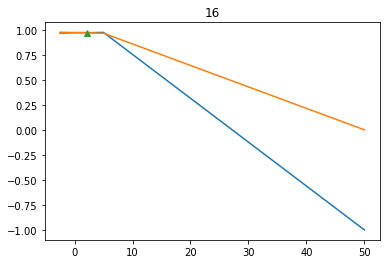

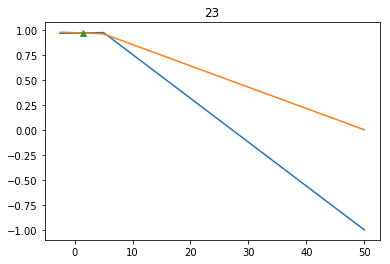

In [22]:
for objid in [11,12,14,16,23]:
    binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


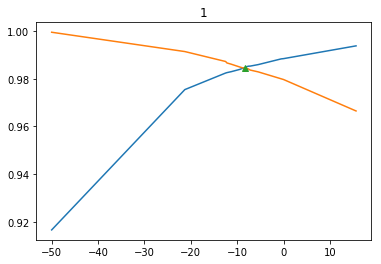

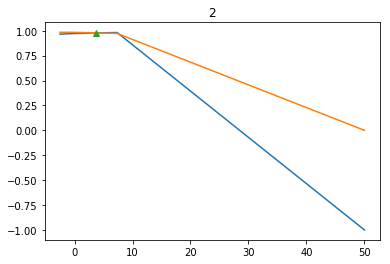

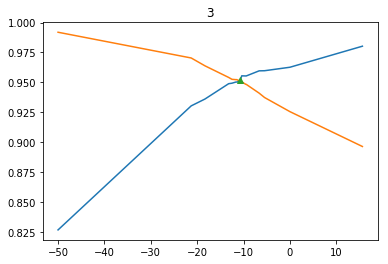

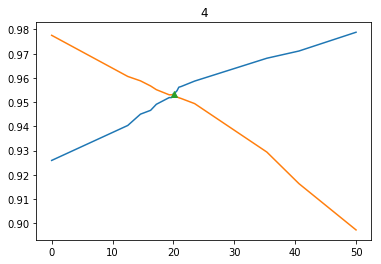

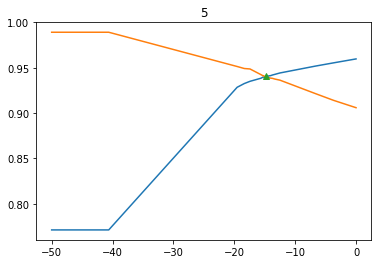

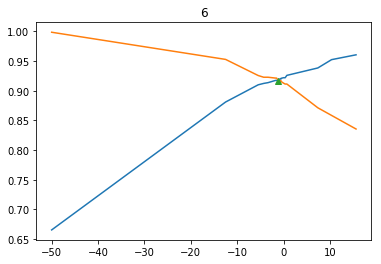

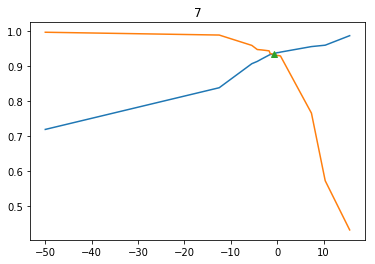

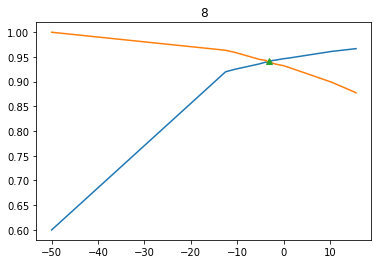

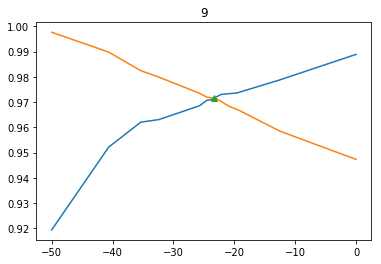

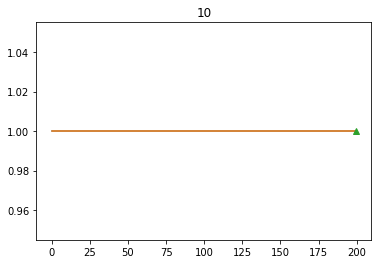

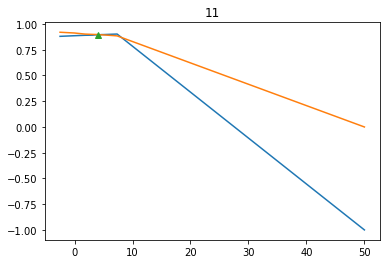

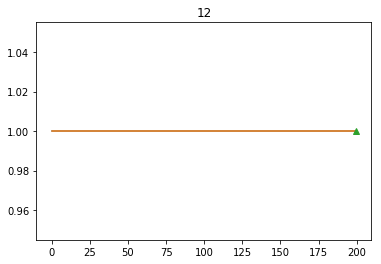

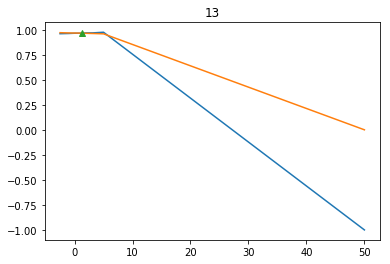

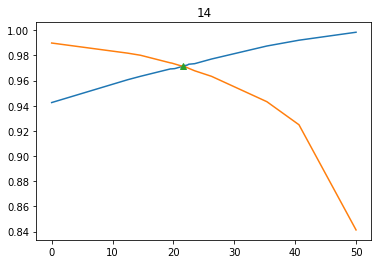

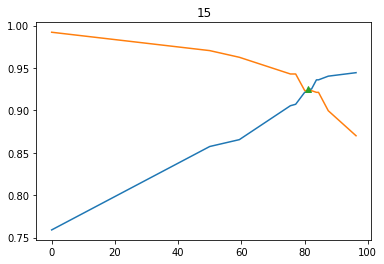

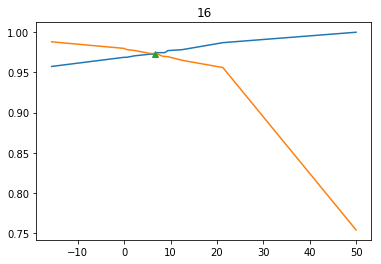

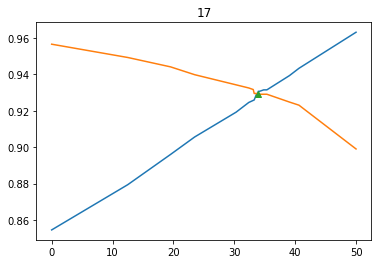

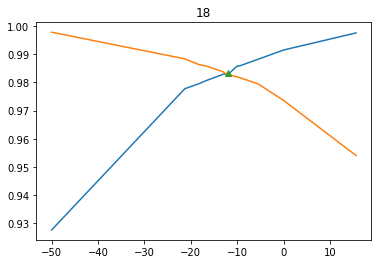

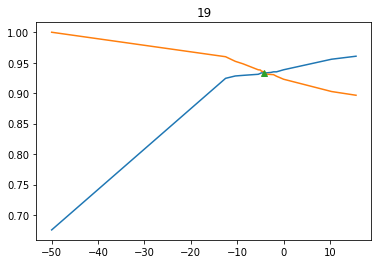

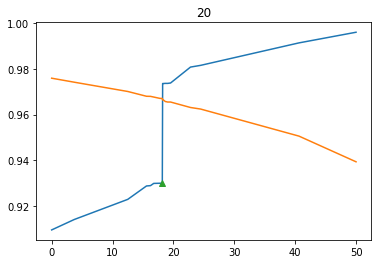

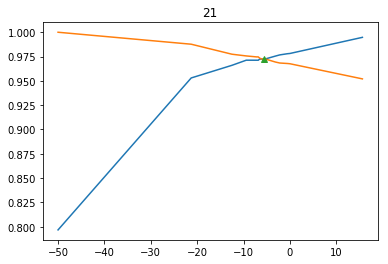

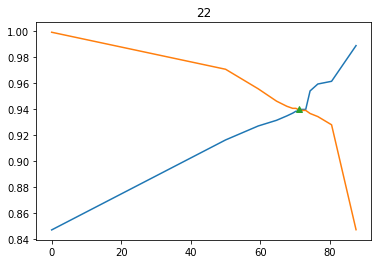

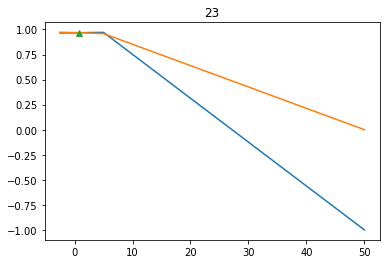

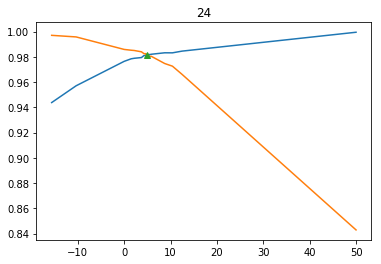

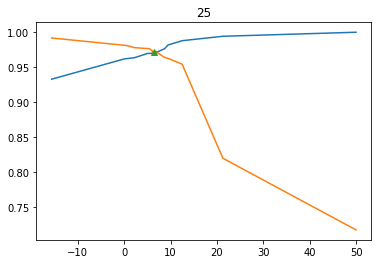

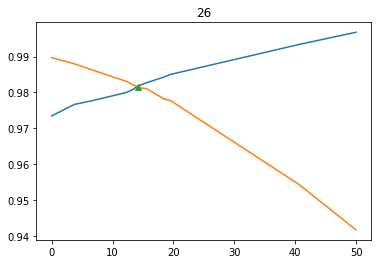

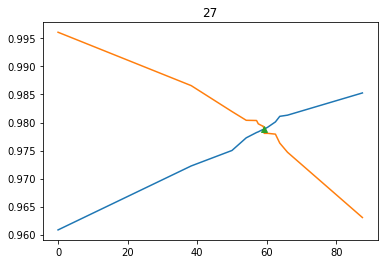

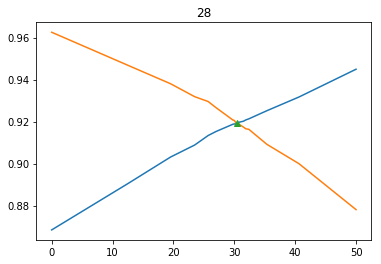

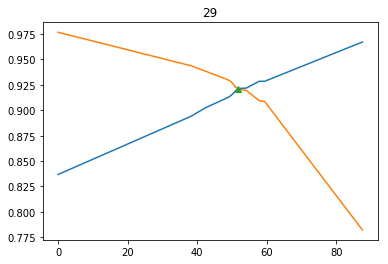

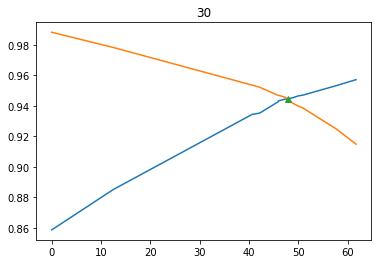

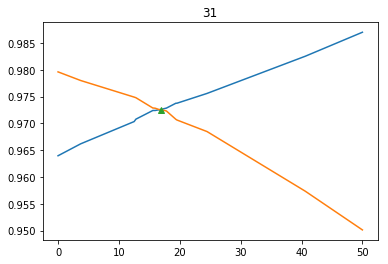

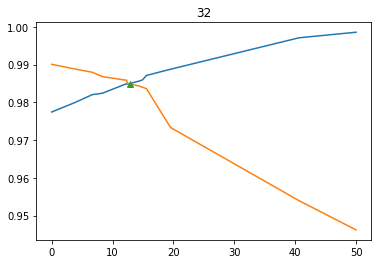

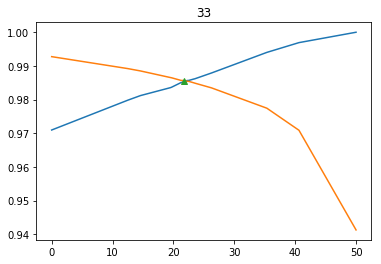

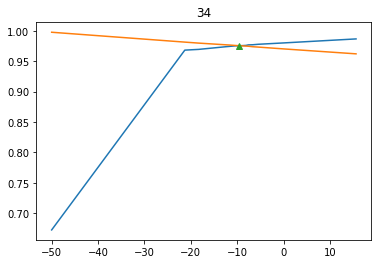

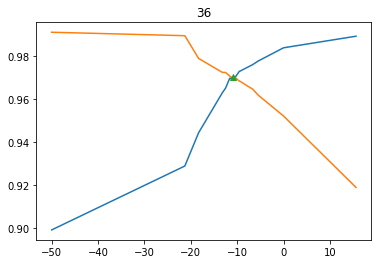

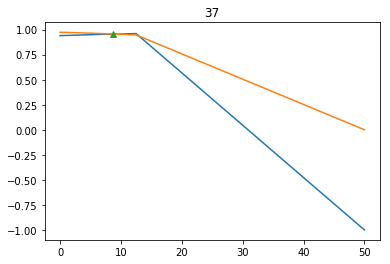

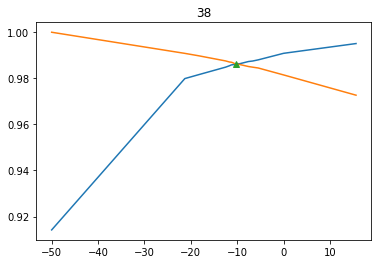

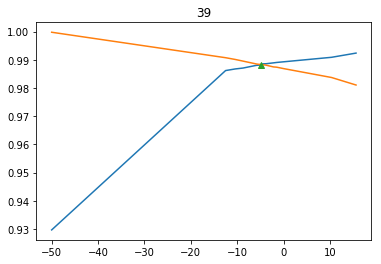

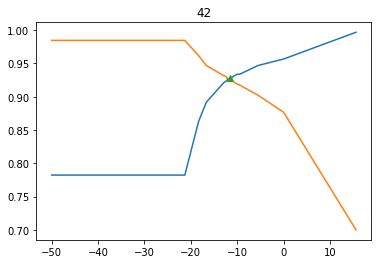

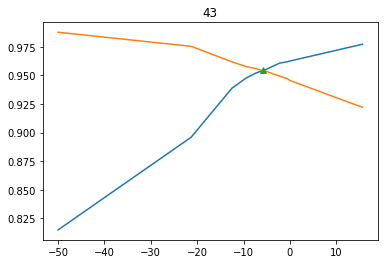

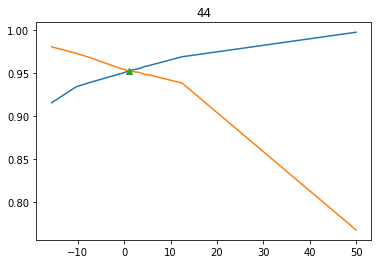

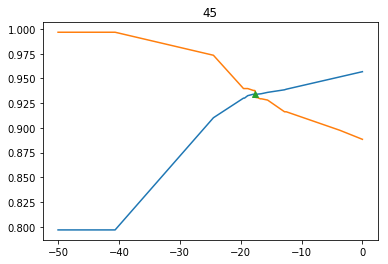

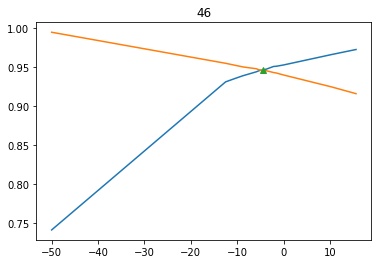

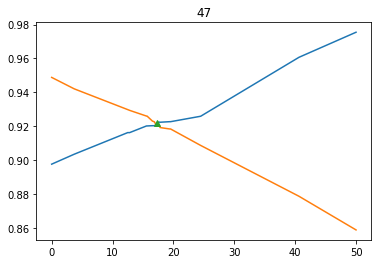

In [23]:
for objid in object_lst:
    binary_search("30workers_rand0", objid, algo,thresh,cluster_id="",exclude_isovote=False)

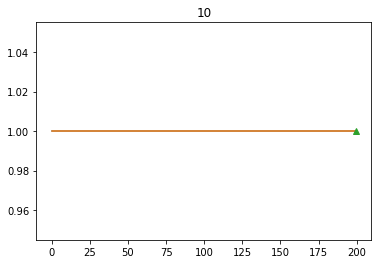

In [24]:
binary_search("30workers_rand0", 10, algo,thresh,cluster_id="",exclude_isovote=False)

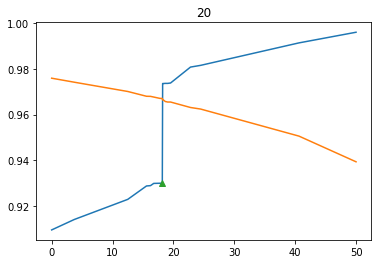

In [25]:
binary_search("30workers_rand0", 20, algo,thresh,cluster_id="",exclude_isovote=False)

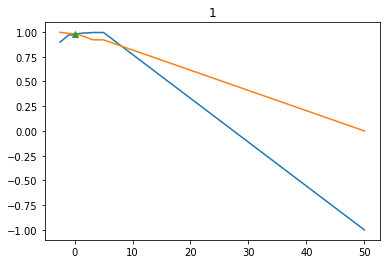

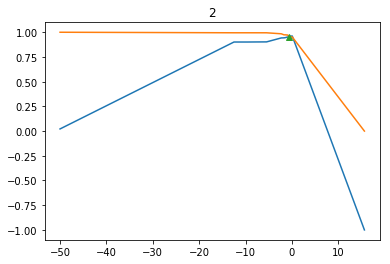

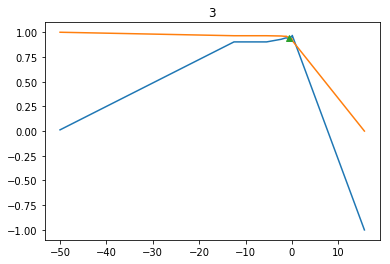

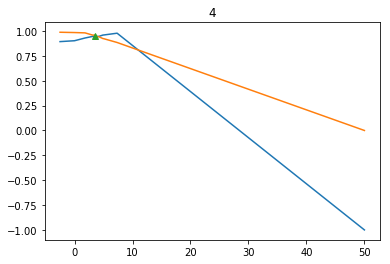

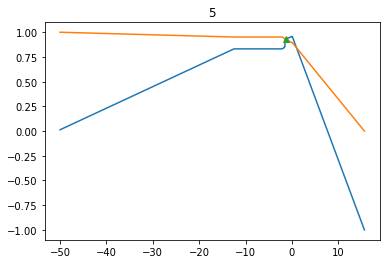

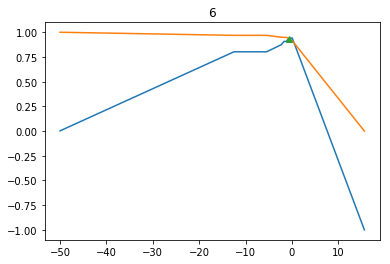

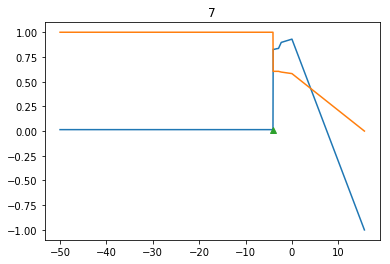

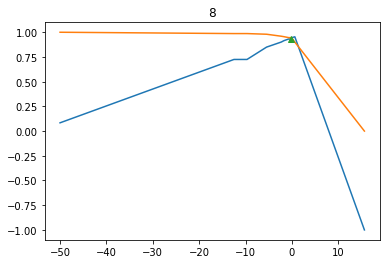

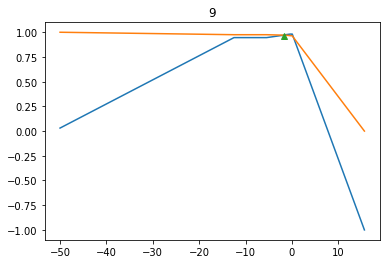

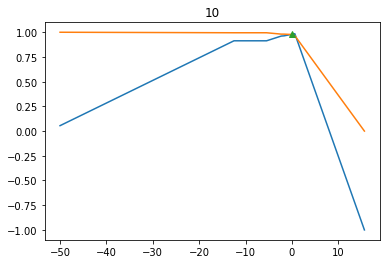

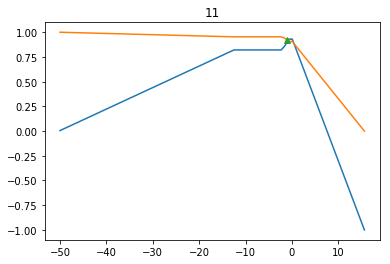

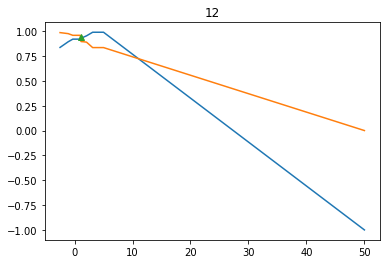

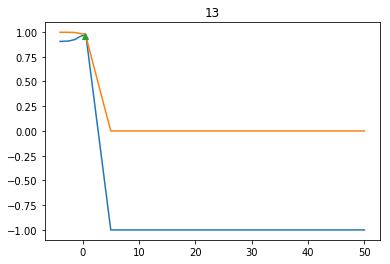

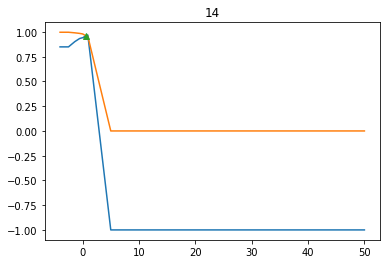

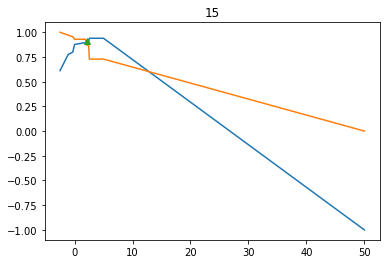

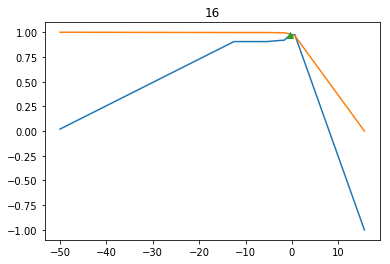

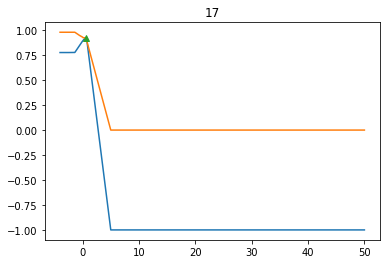

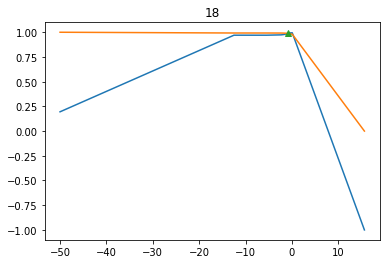

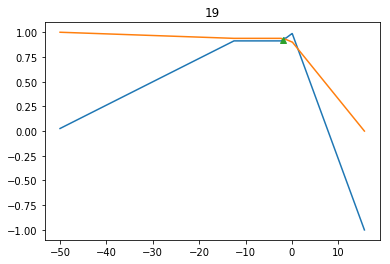

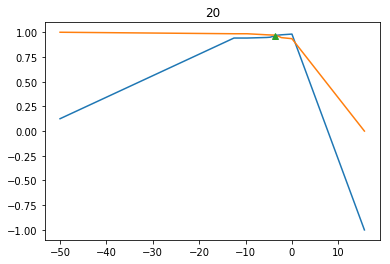

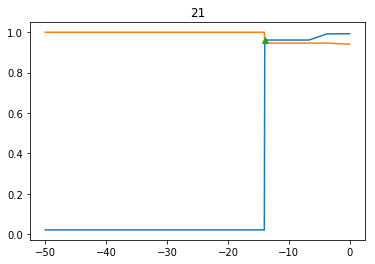

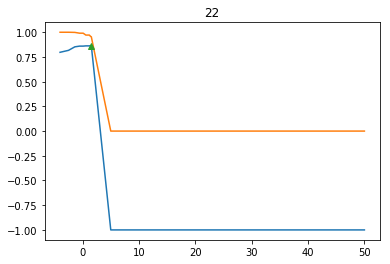

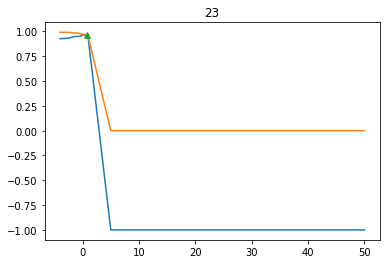

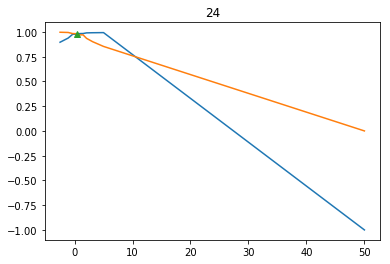

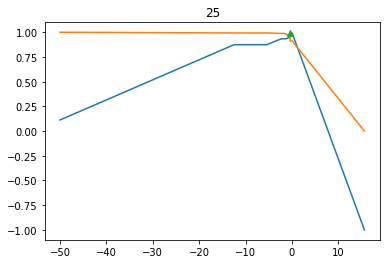

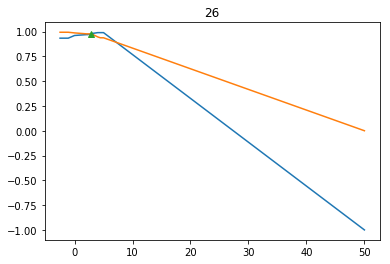

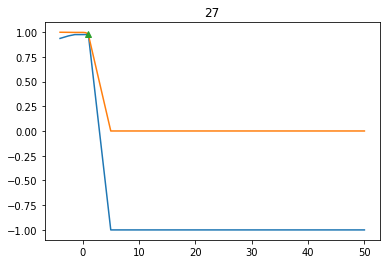

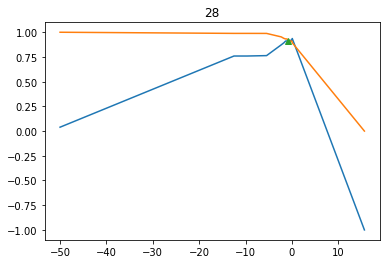

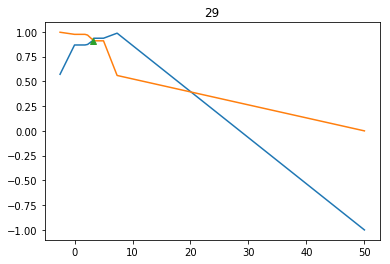

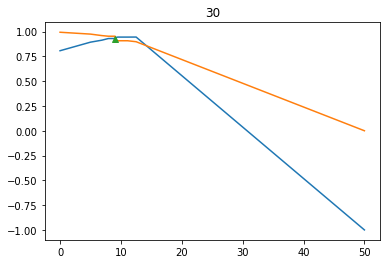

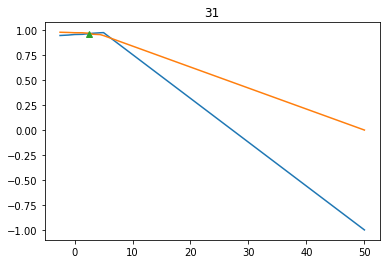

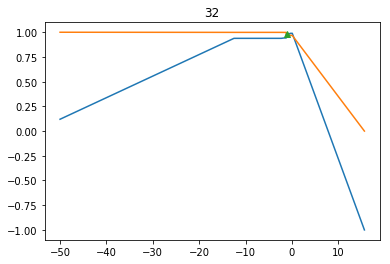

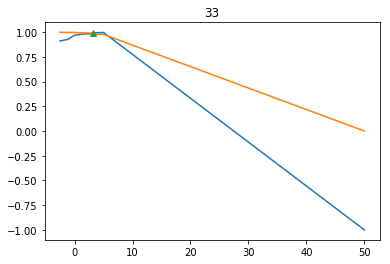

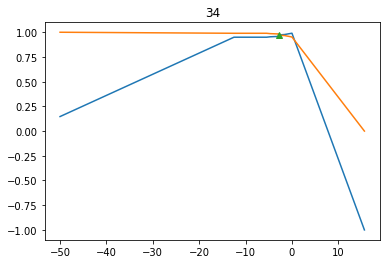

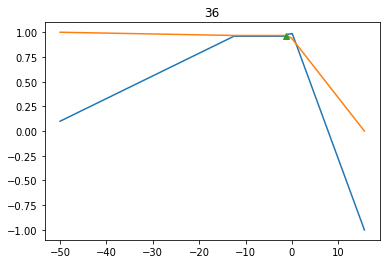

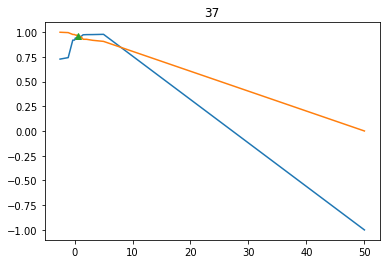

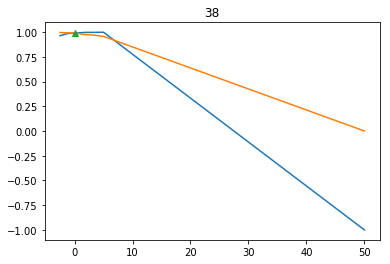

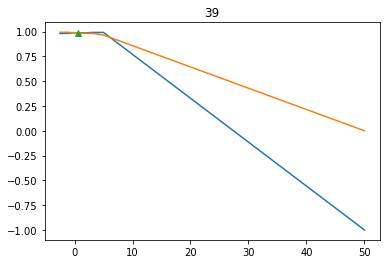

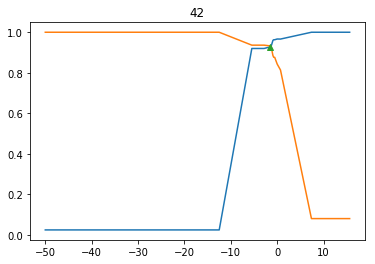

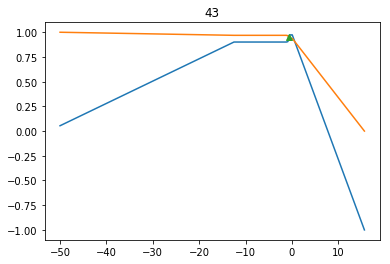

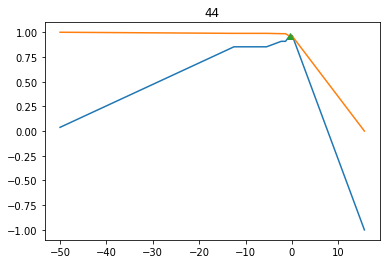

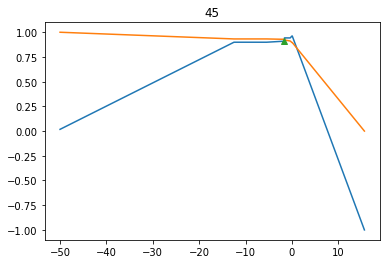

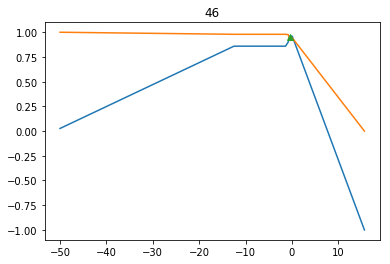

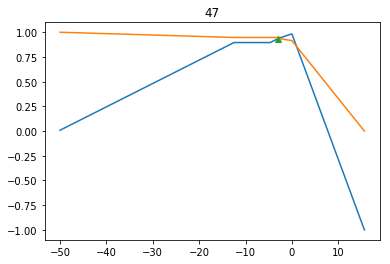

In [26]:
for objid in object_lst:
    binary_search("5workers_rand0", objid, algo,thresh,cluster_id="",exclude_isovote=False)

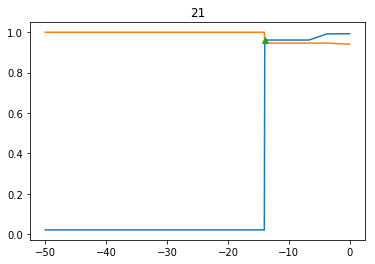

In [27]:
binary_search("5workers_rand0", 21, algo,thresh,cluster_id="",exclude_isovote=False)

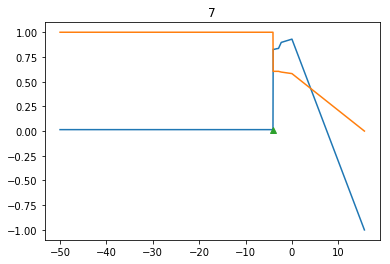

In [28]:
binary_search("5workers_rand0", 7, algo,thresh,cluster_id="",exclude_isovote=False)

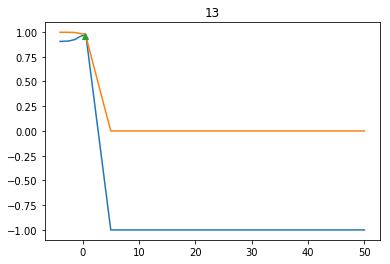

In [29]:
binary_search("5workers_rand0", 13, algo,thresh,cluster_id="",exclude_isovote=False)

# Pipelining

In [43]:
def binarySearchDeriveGTinGroundTruthExperiments(sample, objid, algo,cluster_id="",exclude_isovote=False,rerun_existing=False):
    thresh_min = -200
    thresh_max = 200
    if cluster_id!="" and cluster_id!=-1:
        outdir = '{}{}/obj{}/clust{}/'.format(PIXEL_EM_DIR, sample, objid,cluster_id)
    else:
        outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample, objid)
    if exclude_isovote:
        mode ='iso'
    else:
        mode =''
    if (not rerun_existing) and os.path.exists('{}{}{}_ground_truth_EM_prj_best_thresh.json'.format(outdir,mode,algo)):
        print '{}{}{}_ground_truth_EM_prj_best_thresh.json'.format(outdir,mode,algo)+" already exist"
        return
    delta = np.abs(thresh_max -thresh_min)
    thresh = (thresh_min+thresh_max)/2.
    p,r=0,0
    while (p==-1 or delta>1):
        p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,thresh,cluster_id=cluster_id,exclude_isovote=exclude_isovote,rerun_existing=True)        
        delta = np.abs(thresh_max -thresh_min)
        if p>r:
            right = thresh_min + 0.75*delta  
            thresh_max = right
        else: 
            left = thresh_min + 0.25*delta  
            thresh_min = left
        if p==-1:
            #if p =-1 then it is because the result area is zero, which means nothing was selected for gt
            # this meant that the threshold has overshot
            thresh_max = thresh_min+0.2*delta
        thresh = (thresh_min+thresh_max)/2.
    
    outfile = '{}{}{}_ground_truth_EM_prj_best_thresh.json'.format(outdir,mode,algo)
    with open(outfile, 'w') as fp:
        fp.write(json.dumps([p, r, j]))
    return p,r,j

In [ ]:
for objid in object_lst:
    cluster_ids = df[(df["objid"]==objid)].cluster.unique()
    for cluster_id in cluster_ids:
        worker_ids = np.array(df[(df["objid"]==objid)&(df["cluster"]==cluster_id)].wid)
        if len(worker_ids)!=1:
            print sample + ";" + str(objid)+"; clust"+str(cluster_id)

In [44]:
for sample in tqdm(sample_specs.keys()):
    for objid in object_lst:
        print sample+":"+str(objid)
            binarySearchDeriveGTinGroundTruthExperiments(sample, objid, "basic",exclude_isovote=False,rerun_existing=True)
            binarySearchDeriveGTinGroundTruthExperiments(sample, objid, "GT",exclude_isovote=False,rerun_existing=True)
            binarySearchDeriveGTinGroundTruthExperiments(sample, objid, "GTLSA", exclude_isovote=False,rerun_existing=True)
            binarySearchDeriveGTinGroundTruthExperiments(sample, objid, "GT",exclude_isovote=True,rerun_existing=True)
            binarySearchDeriveGTinGroundTruthExperiments(sample, objid, "GTLSA", exclude_isovote=True,rerun_existing=True)

  0%|          | 0/31 [00:00<?, ?it/s]

25workers_rand0:1
25workers_rand0:2
25workers_rand0:3
25workers_rand0:4
25workers_rand0:5
25workers_rand0:6
25workers_rand0:7
25workers_rand0:8
25workers_rand0:9
25workers_rand0:10
25workers_rand0:11
25workers_rand0:12
25workers_rand0:13
25workers_rand0:14
25workers_rand0:15
25workers_rand0:16
25workers_rand0:17
25workers_rand0:18
25workers_rand0:19
25workers_rand0:20
25workers_rand0:21
25workers_rand0:22
25workers_rand0:23
25workers_rand0:24
25workers_rand0:25
25workers_rand0:26
25workers_rand0:27
25workers_rand0:28
25workers_rand0:29
25workers_rand0:30
25workers_rand0:31
25workers_rand0:32
25workers_rand0:33
25workers_rand0:34
25workers_rand0:36
25workers_rand0:37
25workers_rand0:38
25workers_rand0:39
25workers_rand0:42
25workers_rand0:43
25workers_rand0:44
25workers_rand0:45
25workers_rand0:46
25workers_rand0:47


  3%|▎         | 1/31 [09:20<4:40:21,  0.00it/s]

5workers_rand8:1
5workers_rand8:2
5workers_rand8:3
5workers_rand8:4
5workers_rand8:5
5workers_rand8:6
5workers_rand8:7
5workers_rand8:8
5workers_rand8:9
5workers_rand8:10
5workers_rand8:11


KeyboardInterrupt: 

(0.014632161458333333, 1.0, 0.014632161458333333)

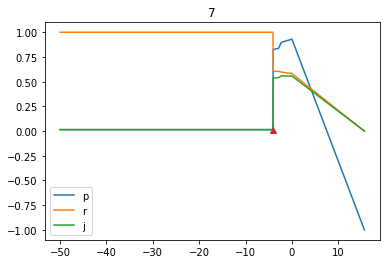

In [274]:
binary_search("5workers_rand0", 7, algo,thresh,cluster_id=-1,exclude_isovote=False,rerun_existing=True)

(0.8692421991084696, 0.6507230255839822, 0.5927051671732523)

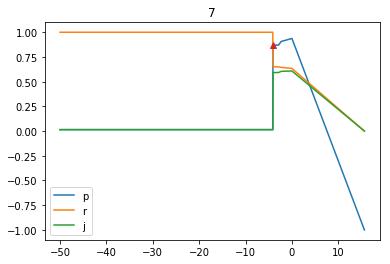

In [273]:
binary_search("5workers_rand0", 7, algo,thresh,cluster_id=0,exclude_isovote=False,rerun_existing=True)